In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)
from libs.lib import *

d:\ads_prj_nckh


In [2]:
exps_dir = "../../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42


In [3]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 1.0, 1: 1.0}

In [4]:
feature_selection=dict(np.load(f'{exps_dir}/feature1/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection

{'LR': ['age',
  'auto_year',
  'collision_type',
  'high_hour',
  'incident_severity',
  'incident_type',
  'injury_claim',
  'number_of_vehicles_involved',
  'policy_csl',
  'vehicle_claim'],
 'LDA': ['age',
  'auto_year',
  'collision_type',
  'high_hour',
  'incident_severity',
  'incident_type',
  'months_as_customer',
  'number_of_vehicles_involved',
  'police_report_available',
  'policy_csl'],
 'DTC': ['auto_make',
  'auto_model',
  'capital-loss',
  'day_policy_bind_date',
  'incident_severity',
  'insured_hobbies',
  'month_policy_bind_date',
  'policy_annual_premium',
  'vehicle_claim',
  'year_policy_bind_date'],
 'RD': ['capital-loss',
  'day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'month_policy_bind_date',
  'property_claim',
  'total_claim_amount',
  'vehicle_claim',
  'year_policy_bind_date'],
 'KNC': ['policy_csl',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_city',
  'property_damage',
  'pol

### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [5]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X[feature_selection[name]],Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 81.507% (0.475%)
Accuracy LDA: 81.117% (1.636%)
Accuracy DTC: 83.275% (3.751%)
Accuracy RD: 88.065% (1.456%)
Accuracy KNC: 73.772% (4.052%)
Accuracy NB: 77.788% (1.881%)
Accuracy SVM: 82.388% (0.810%)
Accuracy NN: 82.780% (1.242%)
Accuracy BG: 81.702% (1.575%)


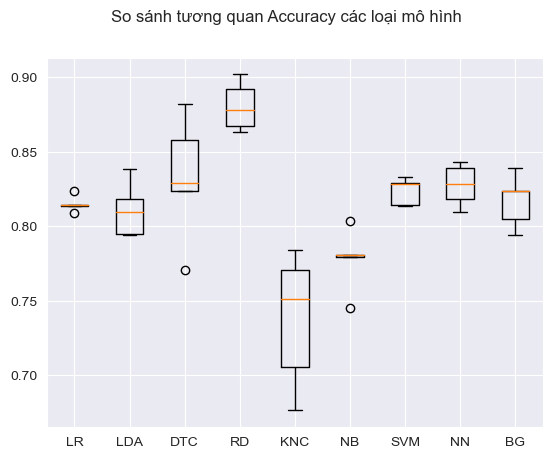

Precision LR: 80.159% (1.754%)
Precision LDA: 78.923% (1.896%)
Precision DTC: 82.167% (1.130%)
Precision RD: 87.294% (1.894%)
Precision KNC: 68.680% (2.989%)
Precision NB: 75.076% (1.138%)
Precision SVM: 81.994% (1.406%)
Precision NN: 82.544% (1.912%)
Precision BG: 82.015% (2.069%)


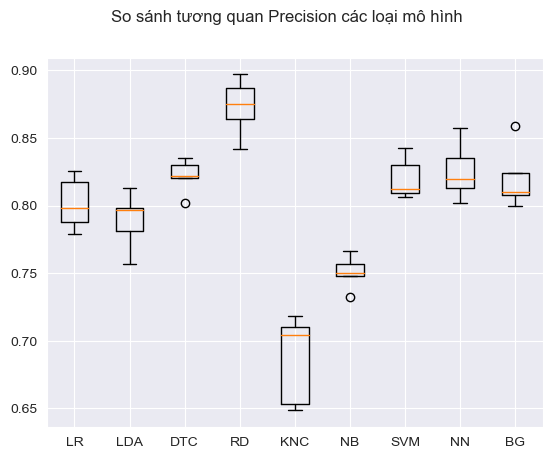

Recall LR: 83.740% (2.087%)
Recall LDA: 84.966% (2.147%)
Recall DTC: 86.588% (4.443%)
Recall RD: 89.281% (2.876%)
Recall KNC: 87.060% (5.350%)
Recall NB: 83.144% (3.011%)
Recall SVM: 82.990% (1.658%)
Recall NN: 83.522% (1.034%)
Recall BG: 81.162% (2.290%)


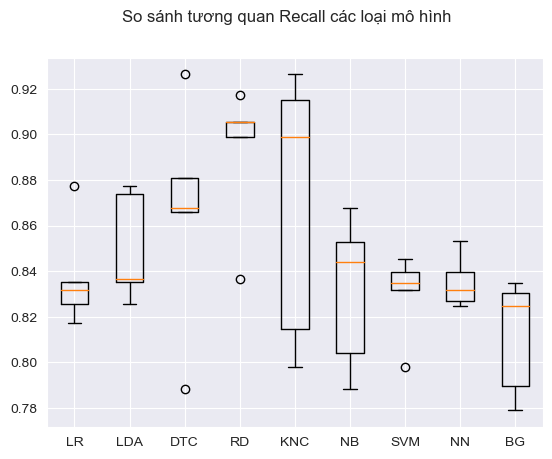

F1 LR: 81.875% (0.857%)
F1 LDA: 81.808% (1.416%)
F1 DTC: 83.534% (3.026%)
F1 RD: 88.222% (1.124%)
F1 KNC: 76.776% (3.916%)
F1 NB: 78.887% (1.810%)
F1 SVM: 82.469% (0.856%)
F1 NN: 82.555% (2.084%)
F1 BG: 81.564% (1.733%)


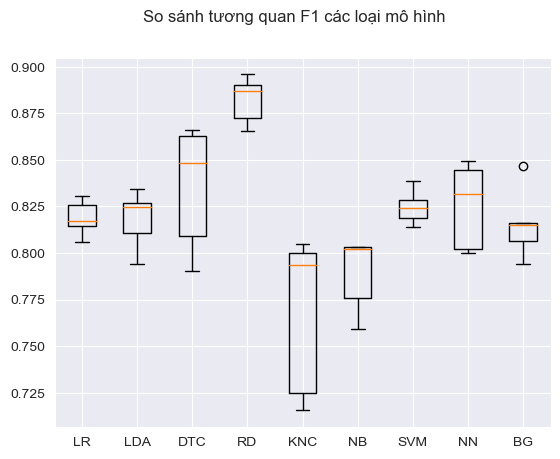

In [6]:
num_folds=5
seed=7
models=[]

models.append(('KNC',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
#models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)



for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_train,y_train,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_train,y_train,names,results,scoring)
    check_model('NB',GaussianNB(),x_train,y_train,names,results,scoring)
    check_model('SVM',SVC(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_train,y_train,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_train,y_train,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    results=[]
    names=[]


Accuracy LR: 75.152% (2.462%)
Accuracy LDA: 77.273% (4.391%)
Accuracy DTC: 76.667% (3.120%)
Accuracy RD: 75.758% (2.535%)
Accuracy KNC: 73.333% (4.556%)
Accuracy NB: 66.364% (2.424%)
Accuracy SVM: 74.545% (4.830%)
Accuracy NN: 76.364% (5.555%)
Accuracy BG: 74.848% (3.120%)


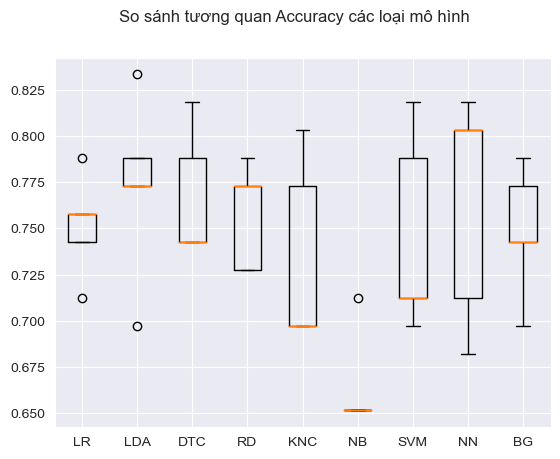

Precision LR: 62.300% (20.534%)
Precision LDA: 68.131% (18.536%)
Precision DTC: 55.221% (11.798%)
Precision RD: 56.488% (10.715%)
Precision KNC: 0.000% (0.000%)
Precision NB: 41.328% (7.937%)
Precision SVM: 62.540% (36.866%)
Precision NN: 52.138% (12.604%)
Precision BG: 53.247% (6.402%)


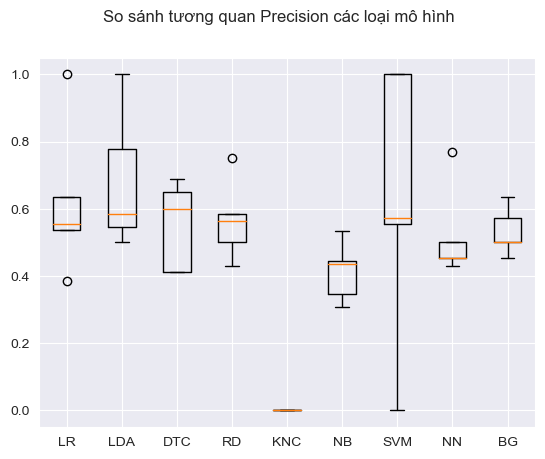

Recall LR: 32.359% (6.401%)
Recall LDA: 35.769% (10.744%)
Recall DTC: 53.564% (7.581%)
Recall RD: 40.897% (5.537%)
Recall KNC: 0.000% (0.000%)
Recall NB: 54.308% (8.251%)
Recall SVM: 14.026% (13.893%)
Recall NN: 47.026% (9.487%)
Recall BG: 44.359% (10.345%)


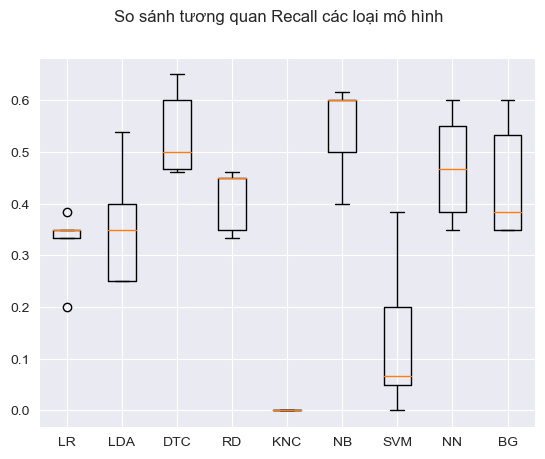

F1 LR: 40.209% (4.047%)
F1 LDA: 44.753% (7.666%)
F1 DTC: 56.677% (8.071%)
F1 RD: 46.889% (5.667%)
F1 KNC: 0.000% (0.000%)
F1 NB: 45.644% (3.301%)
F1 SVM: 19.422% (16.155%)
F1 NN: 50.289% (8.005%)
F1 BG: 47.631% (6.605%)


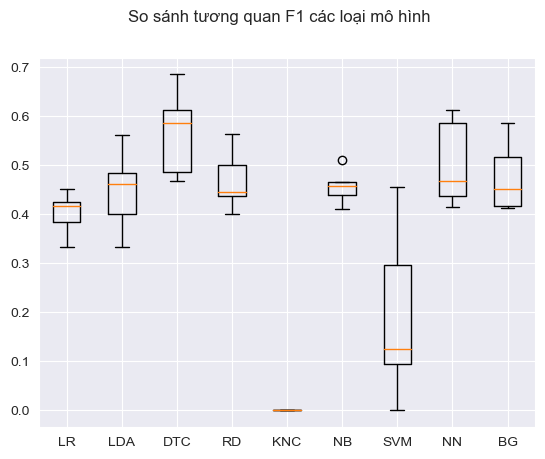

In [7]:
for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),x_test,y_test,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_test,y_test,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(class_weight=class_weights_dict),x_test,y_test,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),x_test,y_test,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_test,y_test,names,results,scoring)
    check_model('NB',GaussianNB(),x_test,y_test,names,results,scoring)
    check_model('SVM',SVC(class_weight=class_weights_dict),x_test,y_test,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_test,y_test,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_test,y_test,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    results=[]
    names=[]

In [8]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


## 2 Mô hình đạt điểm cao nhất là:
    -SVM: Support Vector Machine
    -DTC: DecisionTreeClassifer
    -RD : Random Forest


In [9]:
evaluate_result={}

### Mô hình SVM
      -Tỉ lệ đoán sai ở lớp bị đánh trọng số thấp cao

In [10]:
supervied_features=x_train[feature_selection['SVM']]
supervied_target=y_train
model1=SVC()
# scores = cross_val_score(model1, supervied_features, supervied_target, cv=kfold)
# print("Mean Accuracy:", scores.mean())
# 
model1.fit(supervied_features,supervied_target)

SVC()

In [11]:
# scores = cross_val_score(model1, supervied_features, supervied_target, cv=kfold)
# print("Mean Accuracy:", scores.mean())
# scores

In [12]:
# from sklearn.model_selection import cross_val_predict
# pred = cross_val_score(model1,x_test,y_test)
# print("Mean Accuracy:", pred.mean())
# # pred

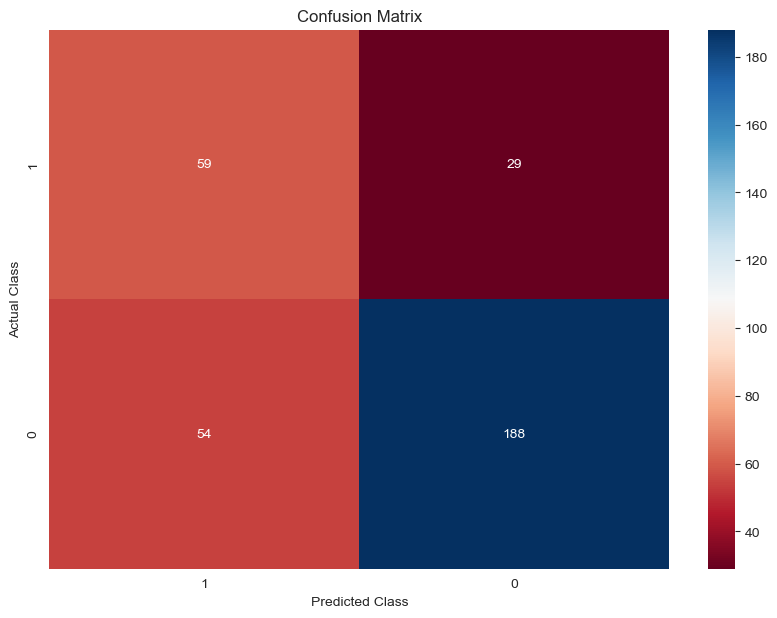

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       242
           1       0.52      0.67      0.59        88

    accuracy                           0.75       330
   macro avg       0.69      0.72      0.70       330
weighted avg       0.77      0.75      0.76       330



In [13]:
predictions = model1.predict(x_test[feature_selection['SVM']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### DecisionTreeClassifer

In [14]:
supervied_features=x_train[feature_selection['DTC']]
supervied_target=y_train
model2=DecisionTreeClassifier(class_weight=class_weights_dict)
# scores = cross_val_score(model2, supervied_features, supervied_target, cv=kfold)
# print("Mean Accuracy:", scores.mean())
model2.fit(supervied_features,supervied_target)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 1.0})

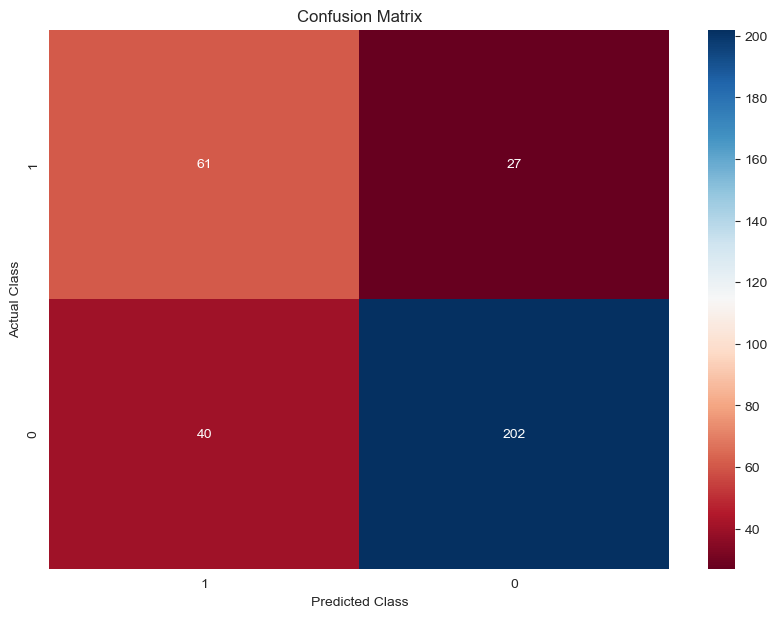

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       242
           1       0.60      0.69      0.65        88

    accuracy                           0.80       330
   macro avg       0.74      0.76      0.75       330
weighted avg       0.81      0.80      0.80       330



In [15]:
predictions = model2.predict(x_test[feature_selection['DTC']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['DecisionTreeClassifer']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### Random Forest

In [16]:
supervied_features=x_train[feature_selection['RD']]
supervied_target=y_train
model3=RandomForestClassifier(n_estimators=100, random_state=42)
# scores = cross_val_score(model3, supervied_features, supervied_target, cv=kfold)
# print("Mean Accuracy:", scores.mean())
model3.fit(supervied_features,supervied_target)

RandomForestClassifier(random_state=42)

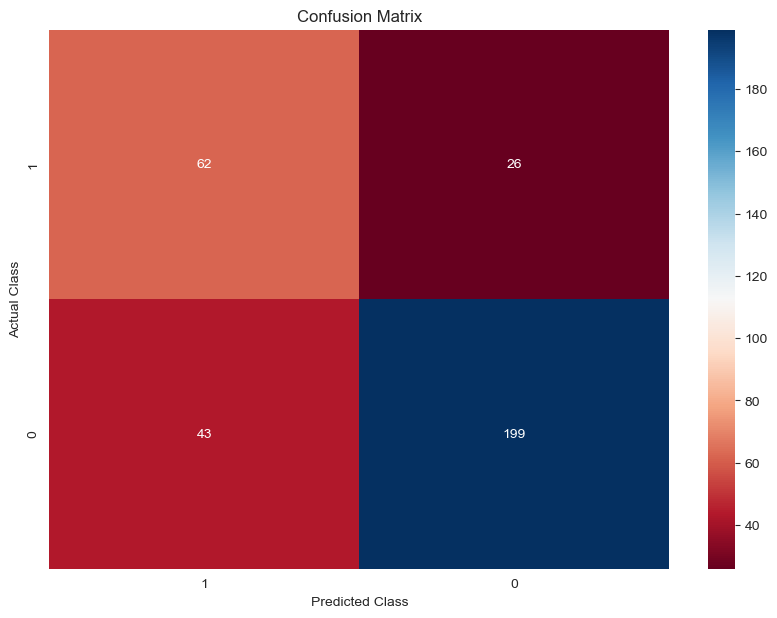

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       242
           1       0.59      0.70      0.64        88

    accuracy                           0.79       330
   macro avg       0.74      0.76      0.75       330
weighted avg       0.81      0.79      0.80       330



In [17]:
predictions = model3.predict(x_test[feature_selection['RD']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['Random Forest']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

In [18]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

SVM
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       242
           1       0.52      0.67      0.59        88

    accuracy                           0.75       330
   macro avg       0.69      0.72      0.70       330
weighted avg       0.77      0.75      0.76       330

DecisionTreeClassifer
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       242
           1       0.60      0.69      0.65        88

    accuracy                           0.80       330
   macro avg       0.74      0.76      0.75       330
weighted avg       0.81      0.80      0.80       330

Random Forest
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       242
           1       0.59      0.70      0.64        88

    accuracy                           0.79       330
   macro avg       0.74      0.76      0.75       330
weighted avg       0.81      0.79 

In [19]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [20]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [21]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,model2, x_test[feature_selection['DTC']], y_test):
        solandung+=1


Lần thứ 1: 
True: N
Predicted: N
----------------------------
Lần thứ 2: 
True: N
Predicted: N
----------------------------
Lần thứ 3: 
True: N
Predicted: N
----------------------------
Lần thứ 4: 
True: N
Predicted: N
----------------------------
Lần thứ 5: 
True: Y
Predicted: Y
----------------------------
Lần thứ 6: 
True: N
Predicted: Y
----------------------------
Lần thứ 7: 
True: N
Predicted: N
----------------------------
Lần thứ 8: 
True: Y
Predicted: Y
----------------------------
Lần thứ 9: 
True: Y
Predicted: Y
----------------------------
Lần thứ 10: 
True: N
Predicted: N
----------------------------


In [22]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 9 chiếm khoảng 90.0% tổng lần dự đoán


In [23]:
solandung=0
hopdonggianlan=0
for indx in range(len(x_test)):
    sample = x_test[feature_selection['DTC']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model2.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
        if Y_check=='Y':
            hopdonggianlan+=1
    


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------


In [24]:
print(f"Số lần dự đoán đúng trong lan kiểm tra: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")
print(f"Số hợp đồng gian lận trong lần kiểm tra: {hopdonggianlan} lần, chiếm khoảng {(hopdonggianlan/len(y_test[y_test['fraud_reported']==1]))*100}% số hợp đồng gian lận trong thực tế")


Số lần dự đoán đúng trong lan kiểm tra: 263 chiếm khoảng 79.6969696969697% tổng lần dự đoán
Số hợp đồng gian lận trong lần kiểm tra: 61 lần, chiếm khoảng 69.31818181818183% số hợp đồng gian lận trong thực tế


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Định nghĩa không gian siêu tham số
param_dist = {'C': uniform(0.1, 10),
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))}

# Khởi tạo mô hình SVM
svm_model = SVC()

# Sử dụng RandomizedSearchCV để tinh chỉnh siêu tham số
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5)
random_search.fit(x_train[feature_selection['SVM']], y_train)

# In ra thông tin của mô hình SVM tốt nhất
print("Best SVM Hyperparameters:")
print(random_search.best_params_)
C=random_search.best_params_['C']
gamma=random_search.best_params_['gamma']
kernel=random_search.best_params_['kernel']
best_dt_model = random_search.best_estimator_


Best SVM Hyperparameters:
{'C': 3.0226716578871273, 'gamma': 'auto', 'kernel': 'rbf'}


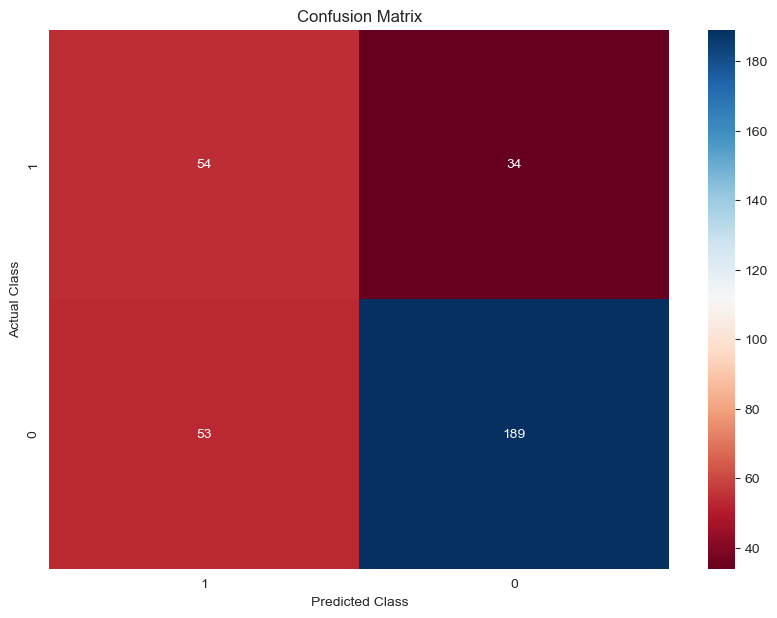

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       242
           1       0.50      0.61      0.55        88

    accuracy                           0.74       330
   macro avg       0.68      0.70      0.68       330
weighted avg       0.76      0.74      0.74       330



In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
predictions = best_dt_model.predict(x_test[feature_selection['SVM']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
fpr, tpr, _ = roc_curve(y_test, predictions)
    
# Tính diện tích dưới đường cong ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
ax.set_title(f'ROC of svm',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'}) 
plt.show()
# evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

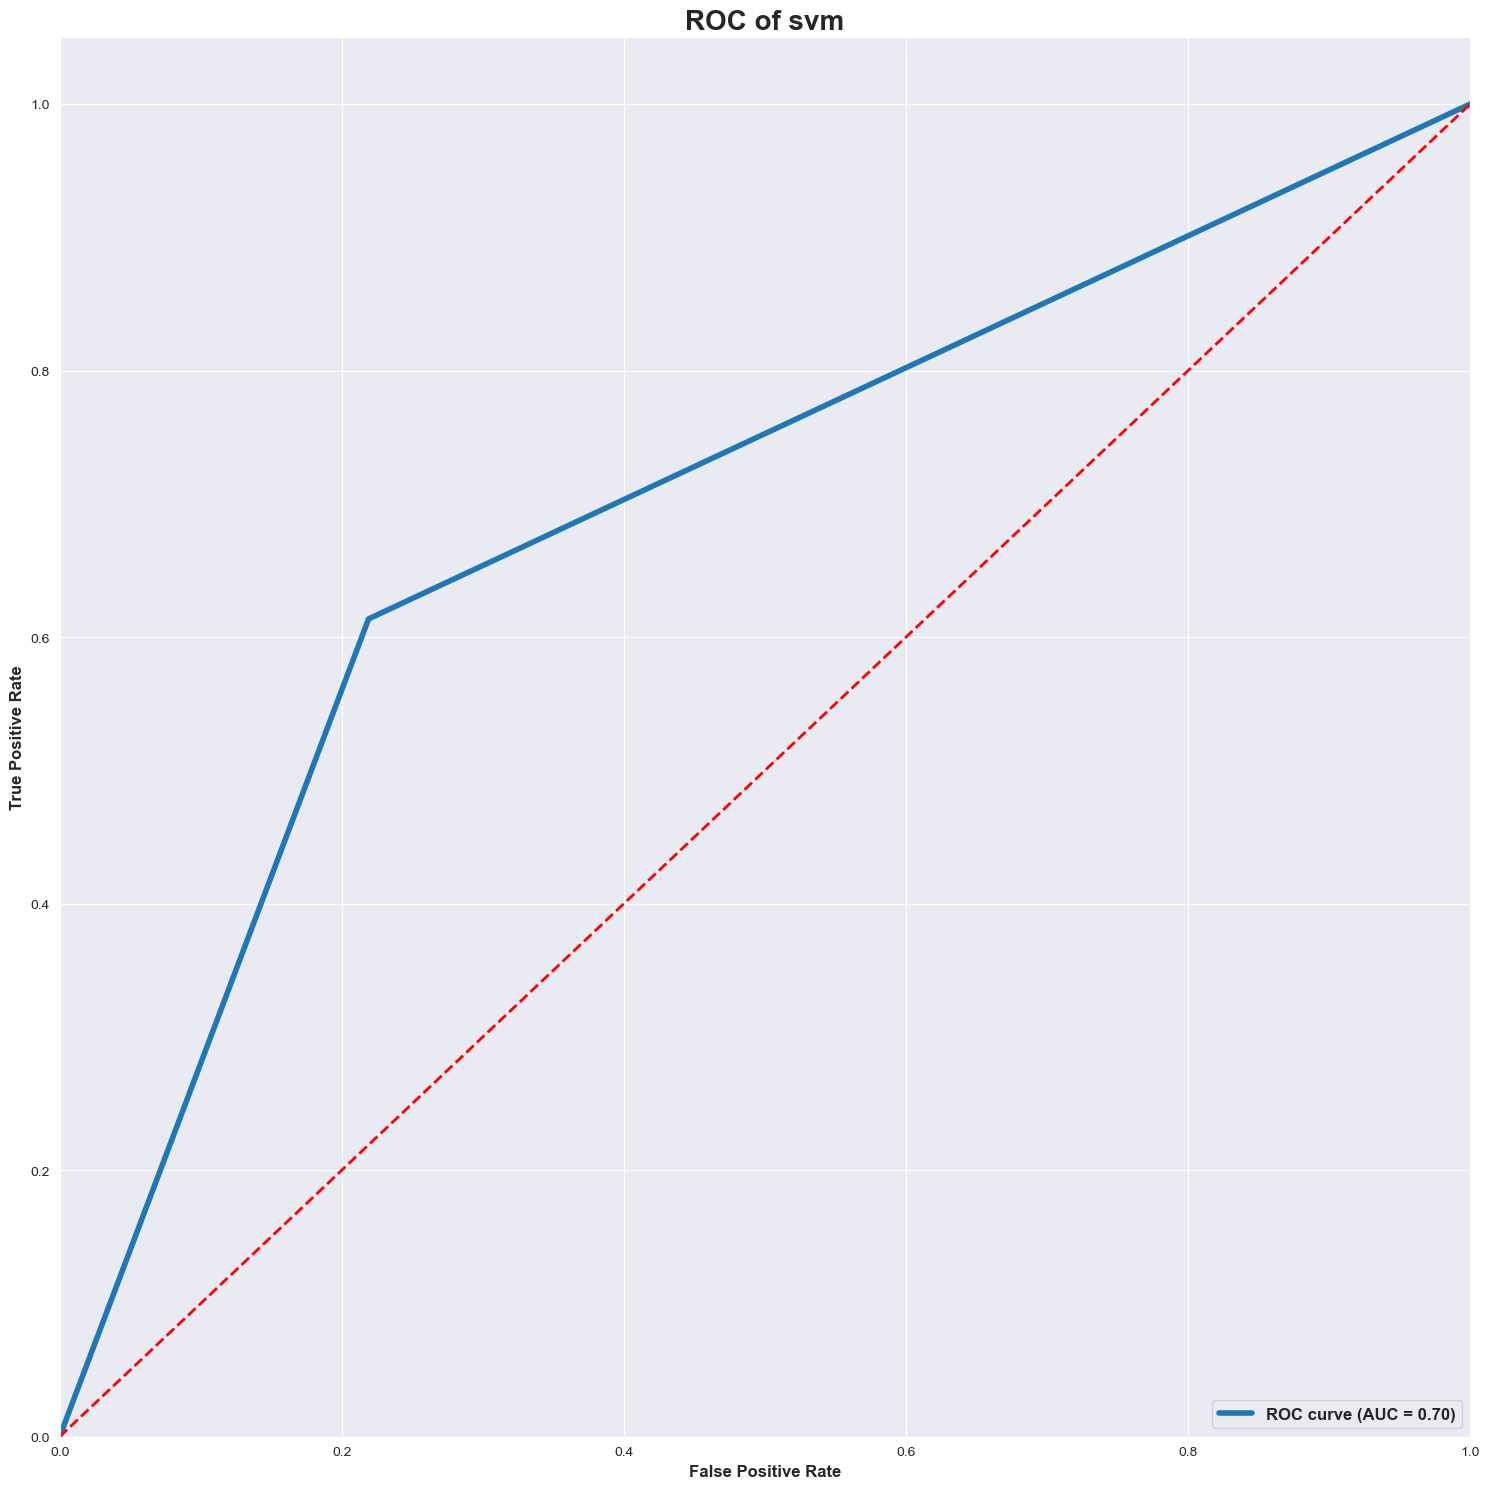

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

fpr, tpr, _ = roc_curve(y_test, predictions)
    
# Tính diện tích dưới đường cong ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
ax.set_title(f'ROC of svm',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'}) 
plt.tight_layout()

plt.show()

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Định nghĩa không gian siêu tham số
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
}

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier()

# Sử dụng RandomizedSearchCV để tinh chỉnh siêu tham số
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5)
random_search_rf.fit(x_train[feature_selection['RD']], y_train)

# In ra thông tin của mô hình Random Forest tốt nhất
print("Best Random Forest Hyperparameters:")
print(random_search_rf.best_params_)
n_estimators=random_search_rf.best_params_['n_estimators']
max_depth=random_search_rf.best_params_['max_depth']
best_rf_model = random_search_rf.best_estimator_


Best Random Forest Hyperparameters:
{'n_estimators': 100, 'max_depth': 10}


In [34]:
best_rf_model

RandomForestClassifier(max_depth=10)

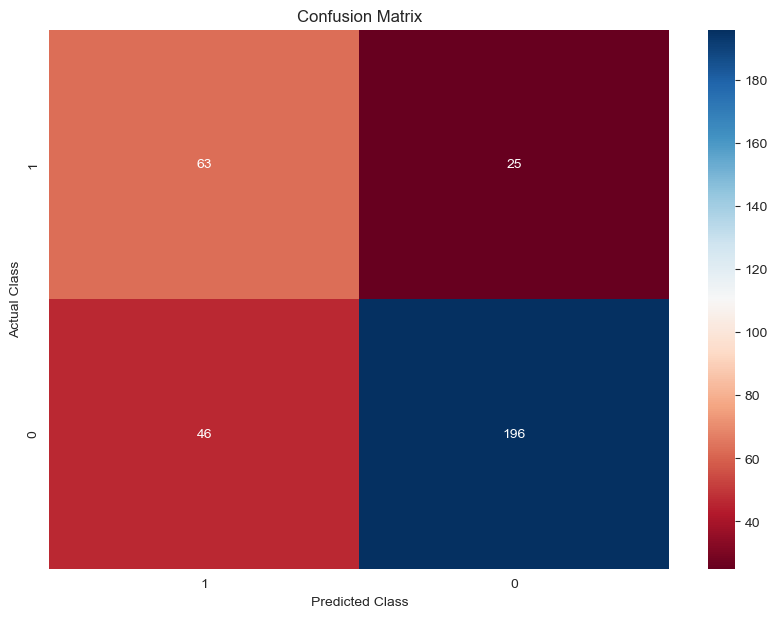

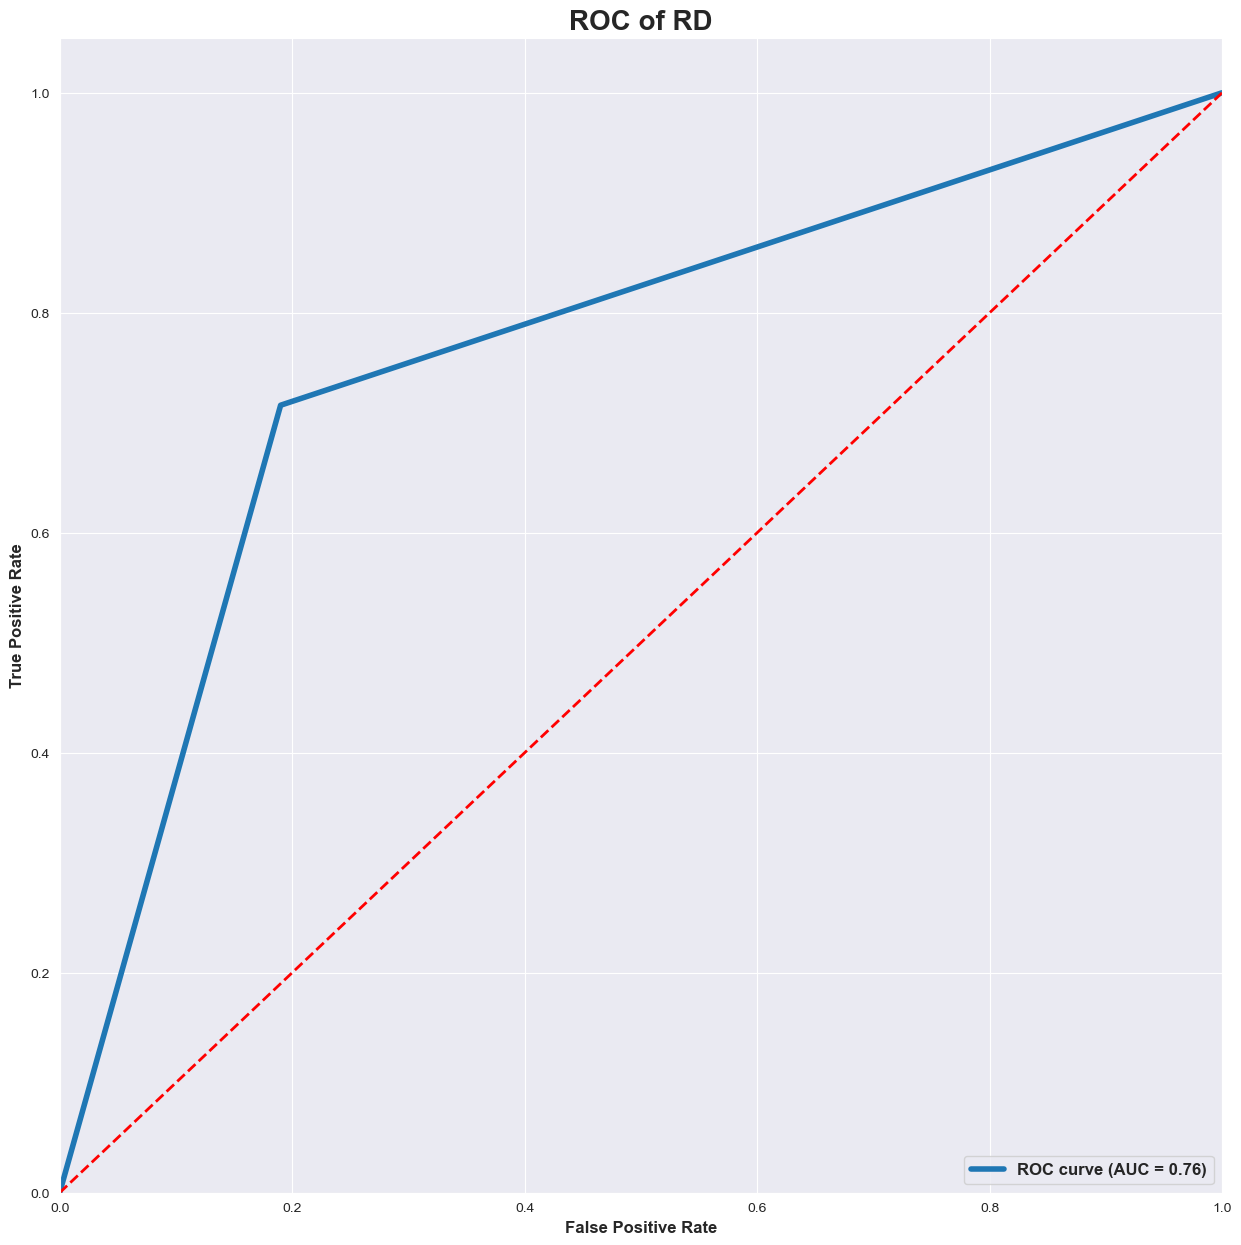

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       242
           1       0.58      0.72      0.64        88

    accuracy                           0.78       330
   macro avg       0.73      0.76      0.74       330
weighted avg       0.80      0.78      0.79       330



In [35]:
predictions = best_rf_model.predict(x_test[feature_selection['RD']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

fpr, tpr, _ = roc_curve(y_test, predictions)
    
# Tính diện tích dưới đường cong ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
ax.set_title(f'ROC of RD',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'}) 
plt.show()
# evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

In [36]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Định nghĩa không gian siêu tham số cho Decision Tree
param_dist_dt = {'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'max_depth': randint(3, 10),
                 'min_samples_split': randint(2, 20),
                 'min_samples_leaf': randint(1, 20)}

# Khởi tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier()

# Sử dụng RandomizedSearchCV để tinh chỉnh siêu tham số
random_search_dt = RandomizedSearchCV(dt_model, param_distributions=param_dist_dt, n_iter=100, scoring='accuracy', cv=5)
random_search_dt.fit(x_train[feature_selection['DTC']], y_train)

# In ra thông tin của mô hình Decision Tree tốt nhất
print("Best Decision Tree Hyperparameters:")
print(random_search_dt.best_params_)
# best_dt_model = random_search_dt.best_estimator_
criterion=random_search_dt.best_params_['criterion']
max_depthdt=random_search_dt.best_params_['max_depth']
min_samples_leaf=random_search_dt.best_params_['min_samples_leaf']
splitter=random_search_dt.best_params_['splitter']
min_samples_split=random_search_dt.best_params_['min_samples_split']
best_dtc_model = random_search_dt.best_estimator_


Best Decision Tree Hyperparameters:
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 17, 'min_samples_split': 18, 'splitter': 'best'}


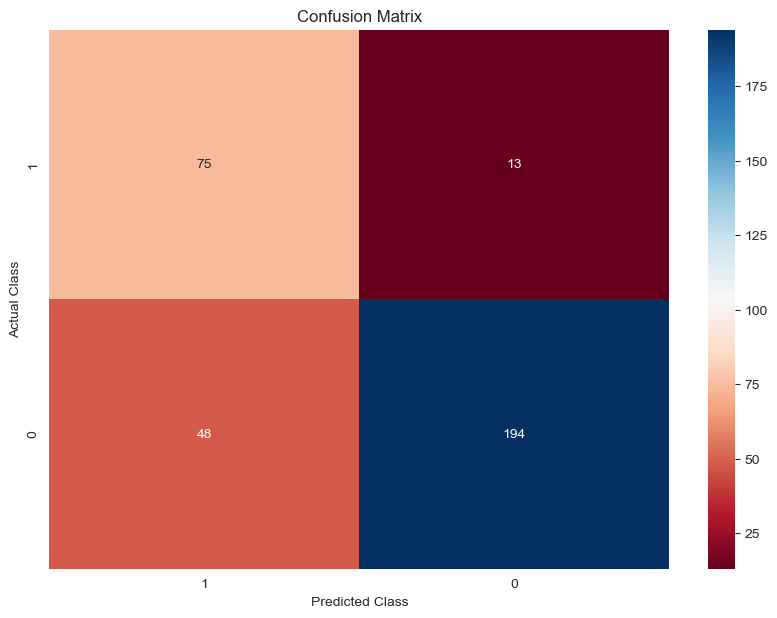

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       242
           1       0.61      0.85      0.71        88

    accuracy                           0.82       330
   macro avg       0.77      0.83      0.79       330
weighted avg       0.85      0.82      0.82       330



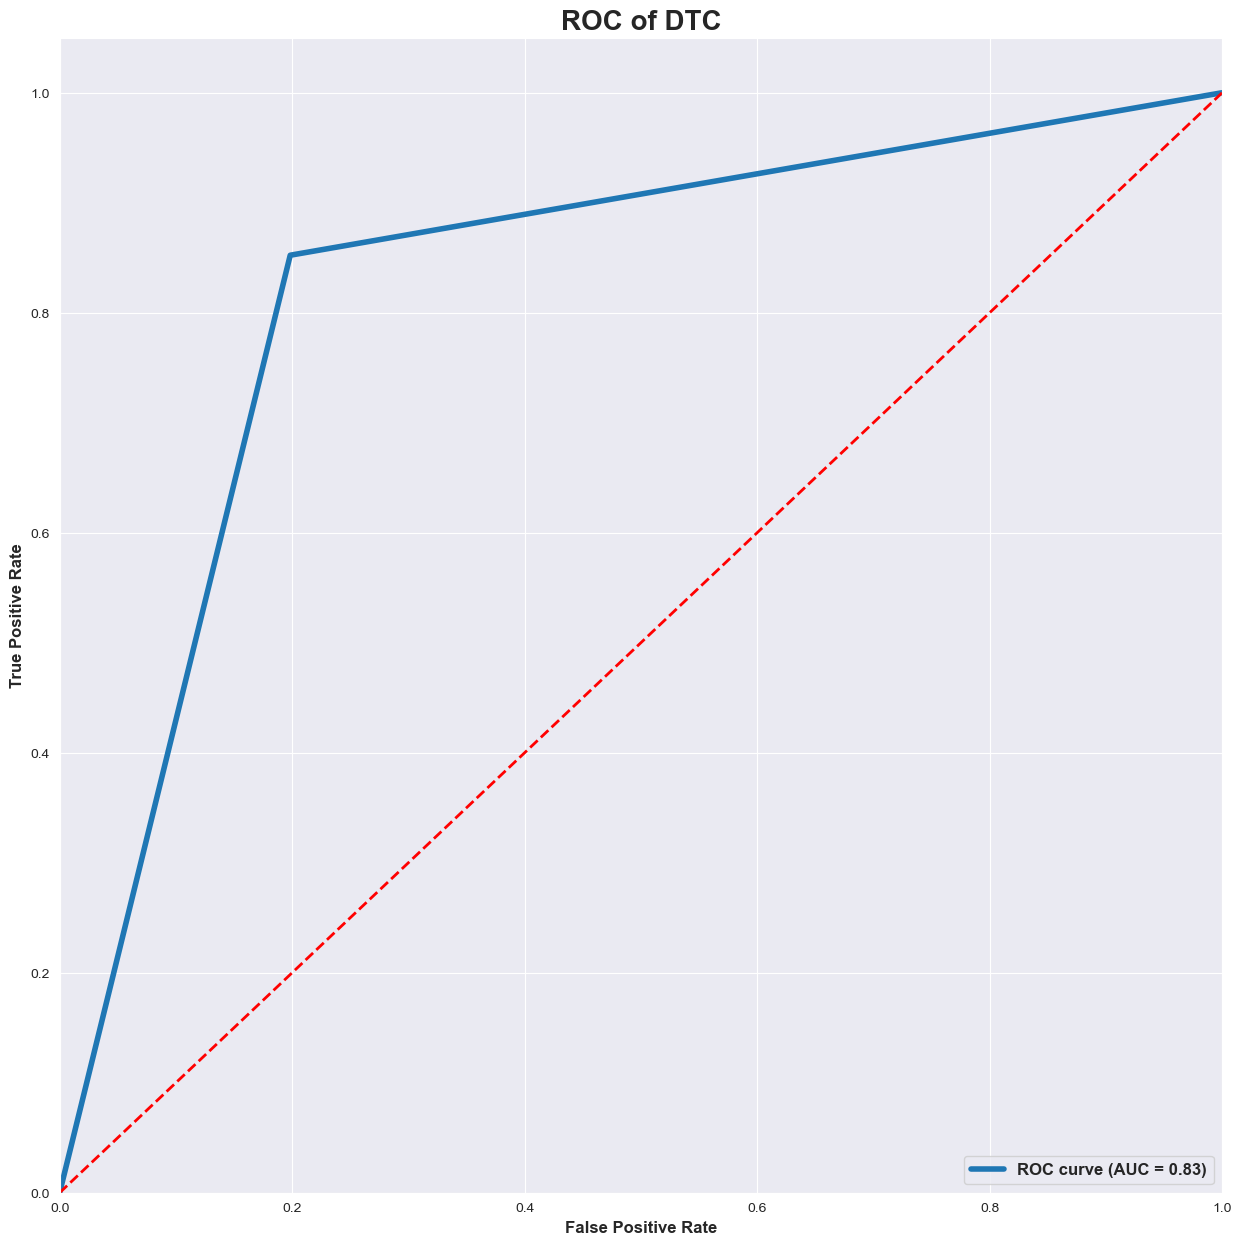

In [37]:
predictions = best_dtc_model.predict(x_test[feature_selection['DTC']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
# evaluate_result['SVM']=classification_report(y_test, predictions)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

fpr, tpr, _ = roc_curve(y_test, predictions)
    
# Tính diện tích dưới đường cong ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
ax.set_title(f'ROC of DTC',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'}) 

print(classification_report(y_test, predictions))

In [38]:
best_dt_model

SVC(C=3.0226716578871273, gamma='auto')

In [39]:
best_dtc_model

DecisionTreeClassifier(max_depth=9, min_samples_leaf=17, min_samples_split=18)

In [40]:
best_rf_model

RandomForestClassifier(max_depth=10)

Accuracy: 0.7848484848484848


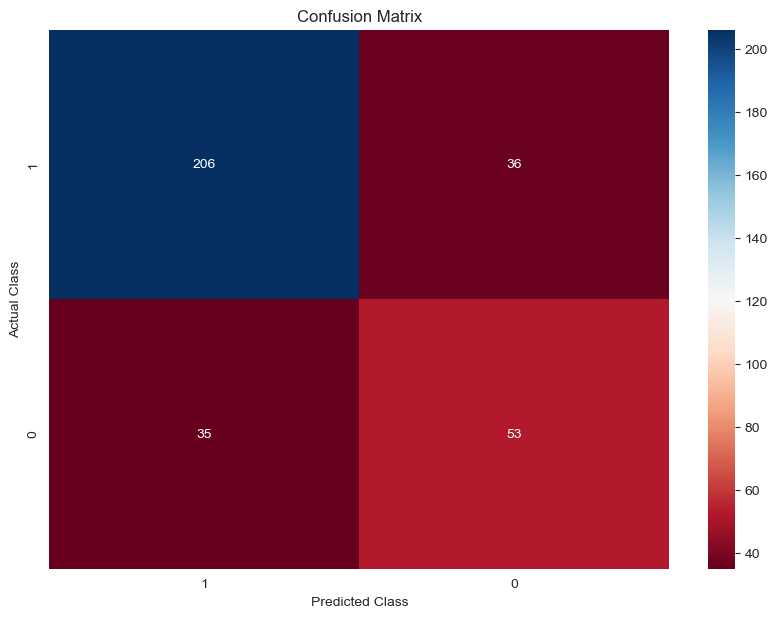

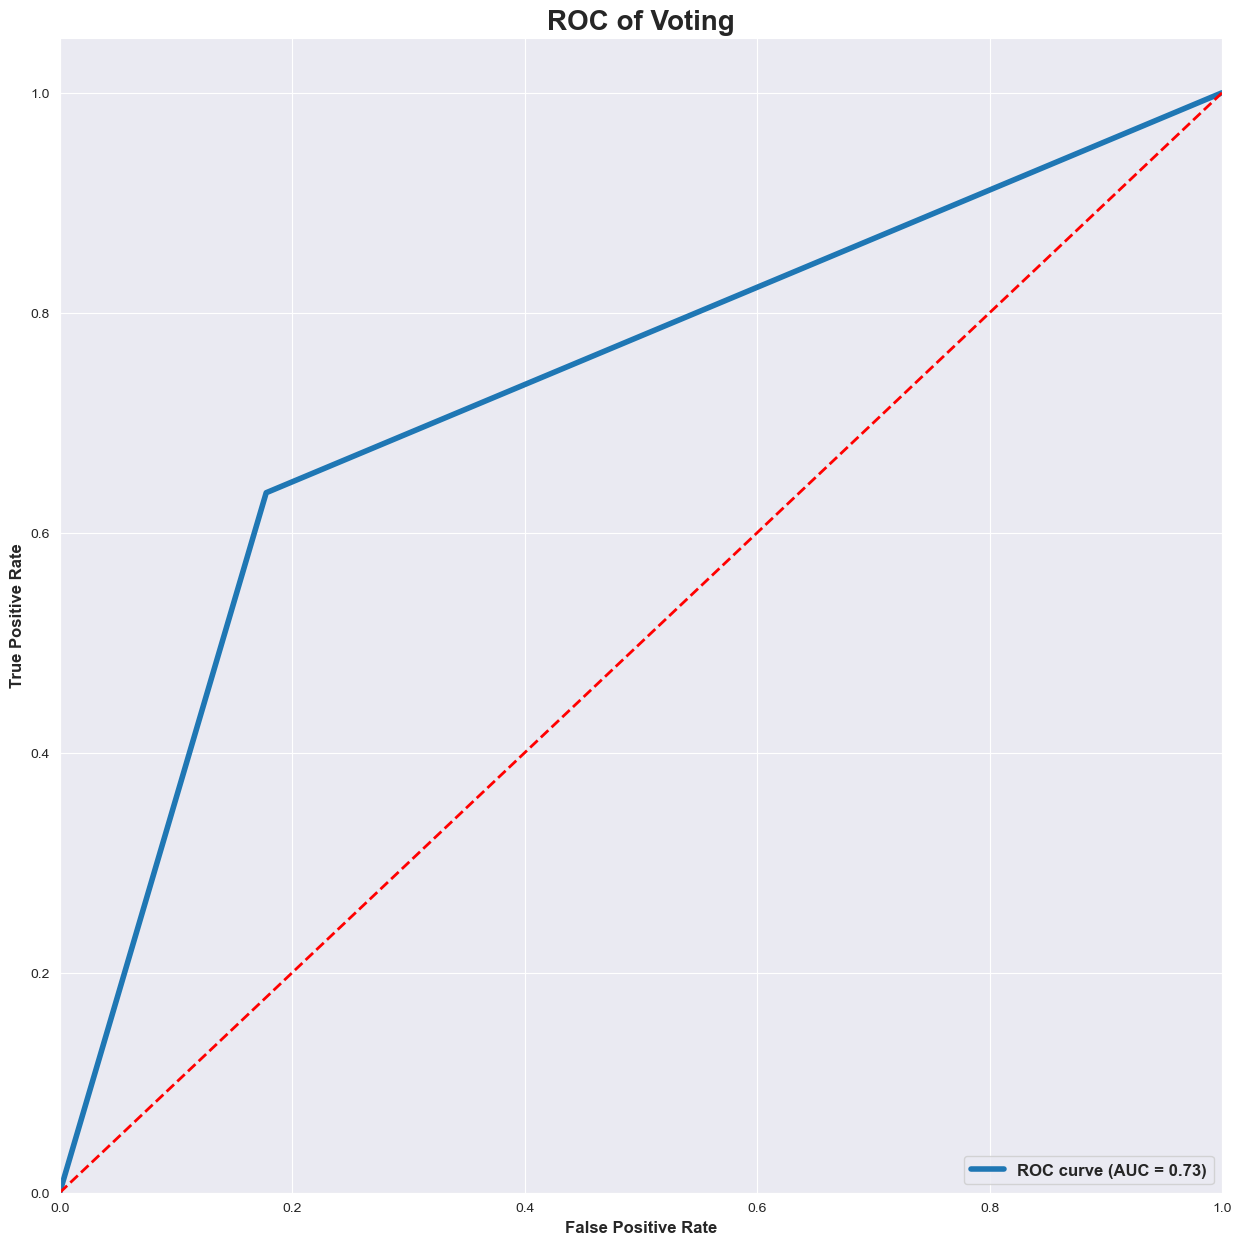

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       242
           1       0.60      0.60      0.60        88

    accuracy                           0.78       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.79      0.78      0.79       330



In [47]:
from sklearn.ensemble import VotingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC

# Load your dataset và chia thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = ...

# # Khởi tạo các mô hình
# model1 = LogisticRegression()
# model2 = DecisionTreeClassifier()
# model3 = SVC()

# Tạo một ensemble voting classifier
voting_clf = VotingClassifier(estimators=[('lr', best_rf_model), ('dt', best_dtc_model), ('svc', best_dt_model)], voting='hard')

# Huấn luyện ensemble model
voting_clf.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = voting_clf.predict(x_test)

# Đánh giá độ chính xác của ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)


# In ma trận nhầm lẫn dưới dạng heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'], cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

fpr, tpr, _ = roc_curve(y_test, predictions)
    
# Tính diện tích dưới đường cong ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
ax.set_title(f'ROC of Voting',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'}) 
plt.show()

# Đánh giá ma trận nhầm lẫn
print("Classification Report:")
print(classification_report(y_test, y_pred))



In [42]:
feature_selection

{'LR': ['age',
  'auto_year',
  'collision_type',
  'high_hour',
  'incident_severity',
  'incident_type',
  'injury_claim',
  'number_of_vehicles_involved',
  'policy_csl',
  'vehicle_claim'],
 'LDA': ['age',
  'auto_year',
  'collision_type',
  'high_hour',
  'incident_severity',
  'incident_type',
  'months_as_customer',
  'number_of_vehicles_involved',
  'police_report_available',
  'policy_csl'],
 'DTC': ['auto_make',
  'auto_model',
  'capital-loss',
  'day_policy_bind_date',
  'incident_severity',
  'insured_hobbies',
  'month_policy_bind_date',
  'policy_annual_premium',
  'vehicle_claim',
  'year_policy_bind_date'],
 'RD': ['capital-loss',
  'day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'month_policy_bind_date',
  'property_claim',
  'total_claim_amount',
  'vehicle_claim',
  'year_policy_bind_date'],
 'KNC': ['policy_csl',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_city',
  'property_damage',
  'pol

In [43]:
# from sklearn.ensemble import GradientBoostingClassifier
# from scipy.stats import uniform, randint

# Định nghĩa không gian siêu tham số cho Gradient Boosting
param_dist_gb = {'n_estimators': randint(50, 200),
                 'learning_rate': uniform(0.01, 0.1),
                 'max_depth': randint(3, 10),
                 'subsample': uniform(0.6, 0.4)}

# Khởi tạo mô hình Gradient Boosting
gb_model = GradientBoostingClassifier()

# Sử dụng RandomizedSearchCV để tinh chỉnh siêu tham số
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=5, scoring='accuracy', cv=5)
random_search_gb.fit(x_train[feature_selection['BG']], y_train)

# In ra thông tin của mô hình Gradient Boosting tốt nhất
print("Best Gradient Boosting Hyperparameters:")
print(random_search_gb.best_params_)
best_gb_model = random_search_gb.best_estimator_
max_depthgb=random_search_gb.best_params_['max_depth']
learning_rate=random_search_gb.best_params_['learning_rate']
n_estimatorsgb=random_search_gb.best_params_['n_estimators']
subsample=random_search_gb.best_params_['subsample']
best_boosting_model = random_search_gb.best_estimator_


Best Gradient Boosting Hyperparameters:
{'learning_rate': 0.06936295538881977, 'max_depth': 8, 'n_estimators': 157, 'subsample': 0.6545322682587179}


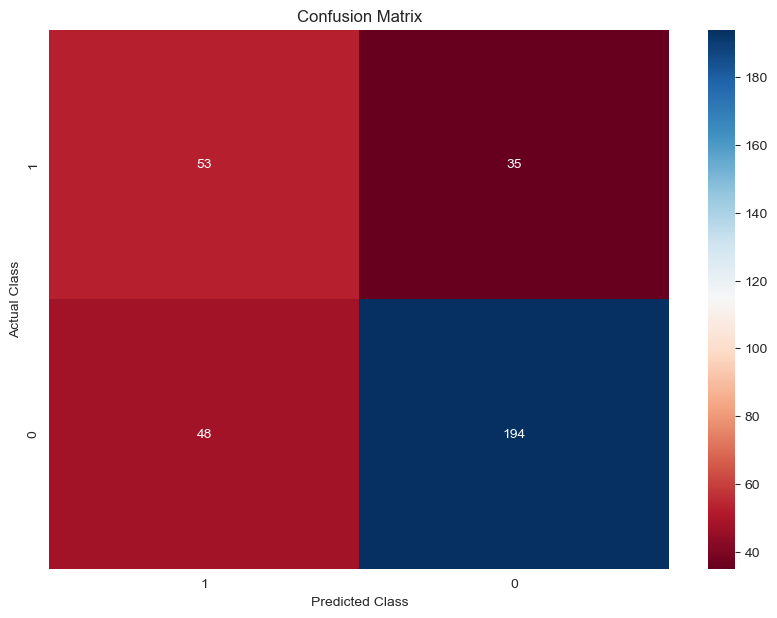

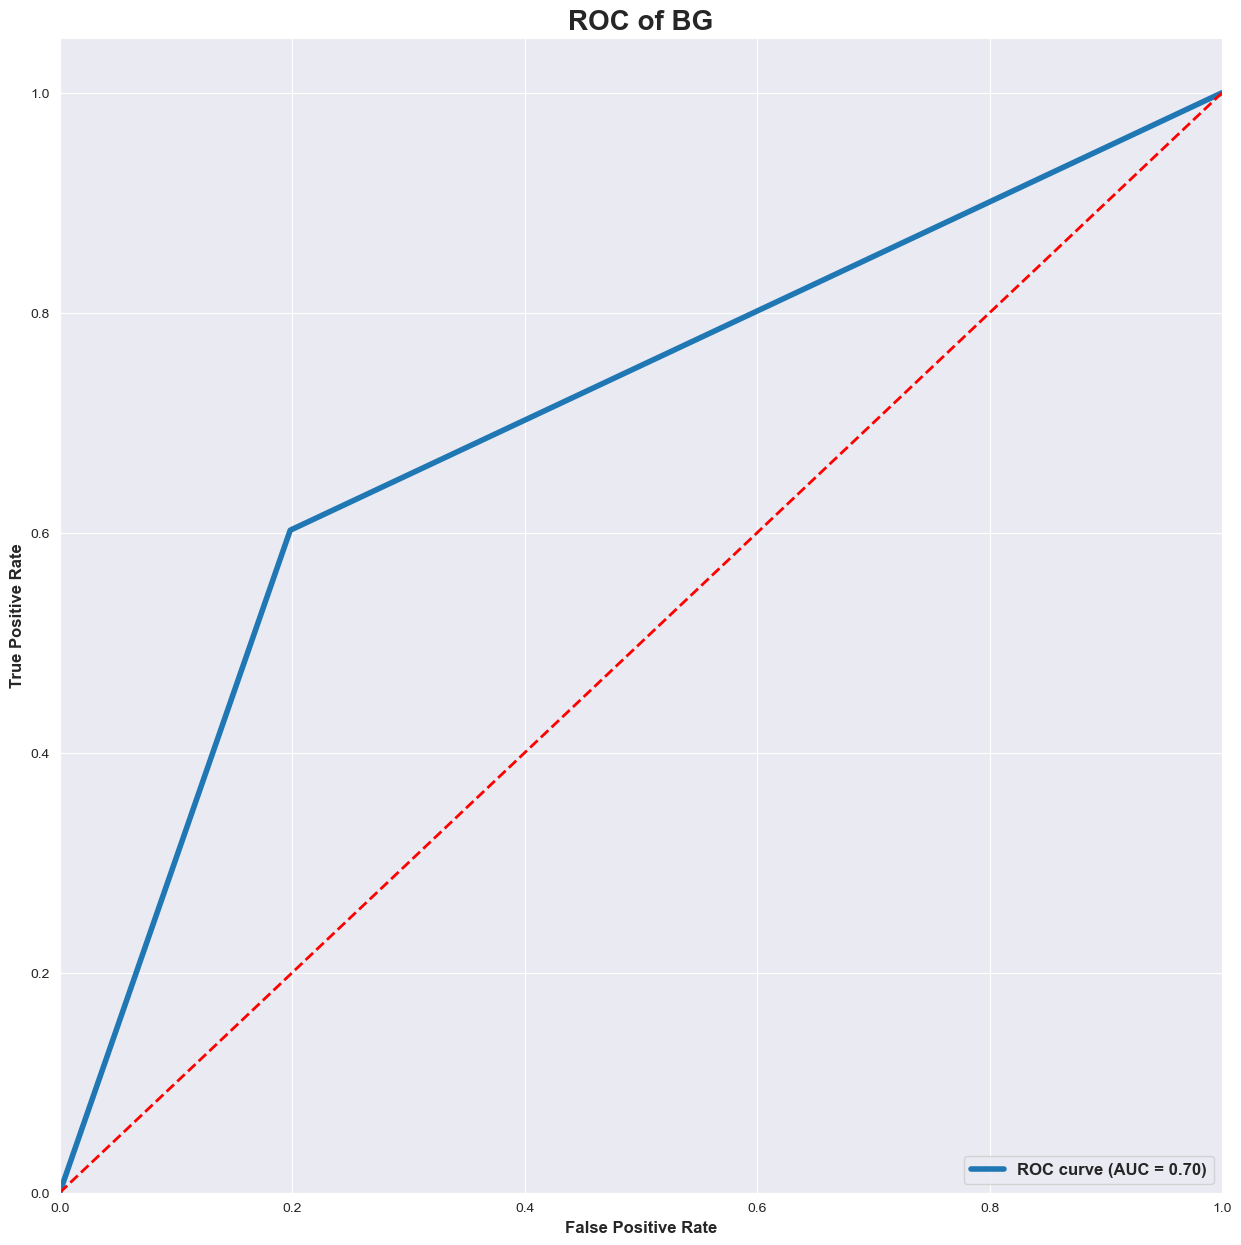

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       242
           1       0.52      0.60      0.56        88

    accuracy                           0.75       330
   macro avg       0.69      0.70      0.69       330
weighted avg       0.76      0.75      0.75       330



In [48]:
predictions = best_boosting_model.predict(x_test[feature_selection['BG']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
fpr, tpr, _ = roc_curve(y_test, predictions)
    
# Tính diện tích dưới đường cong ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
ax.set_title(f'ROC of BG',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'}) 
plt.show()
# evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))


AdaBoost Accuracy DTC: 0.7333333333333333


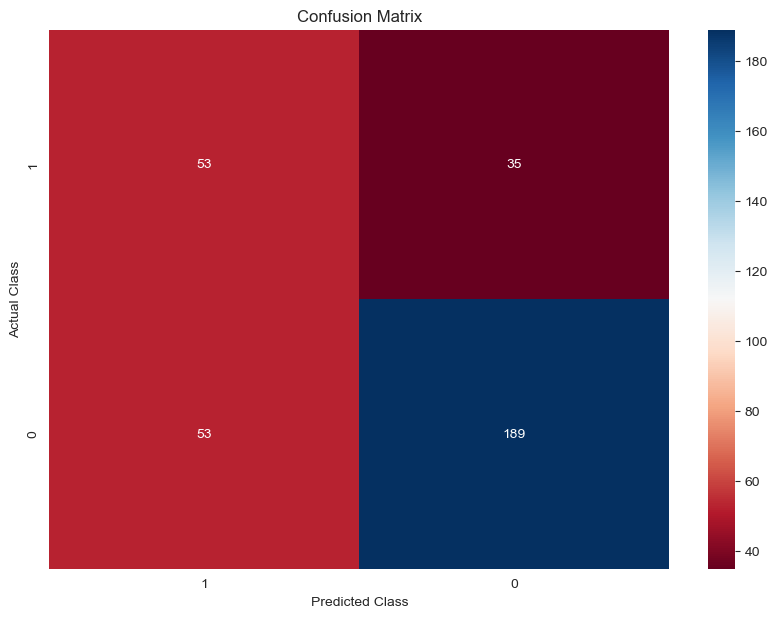

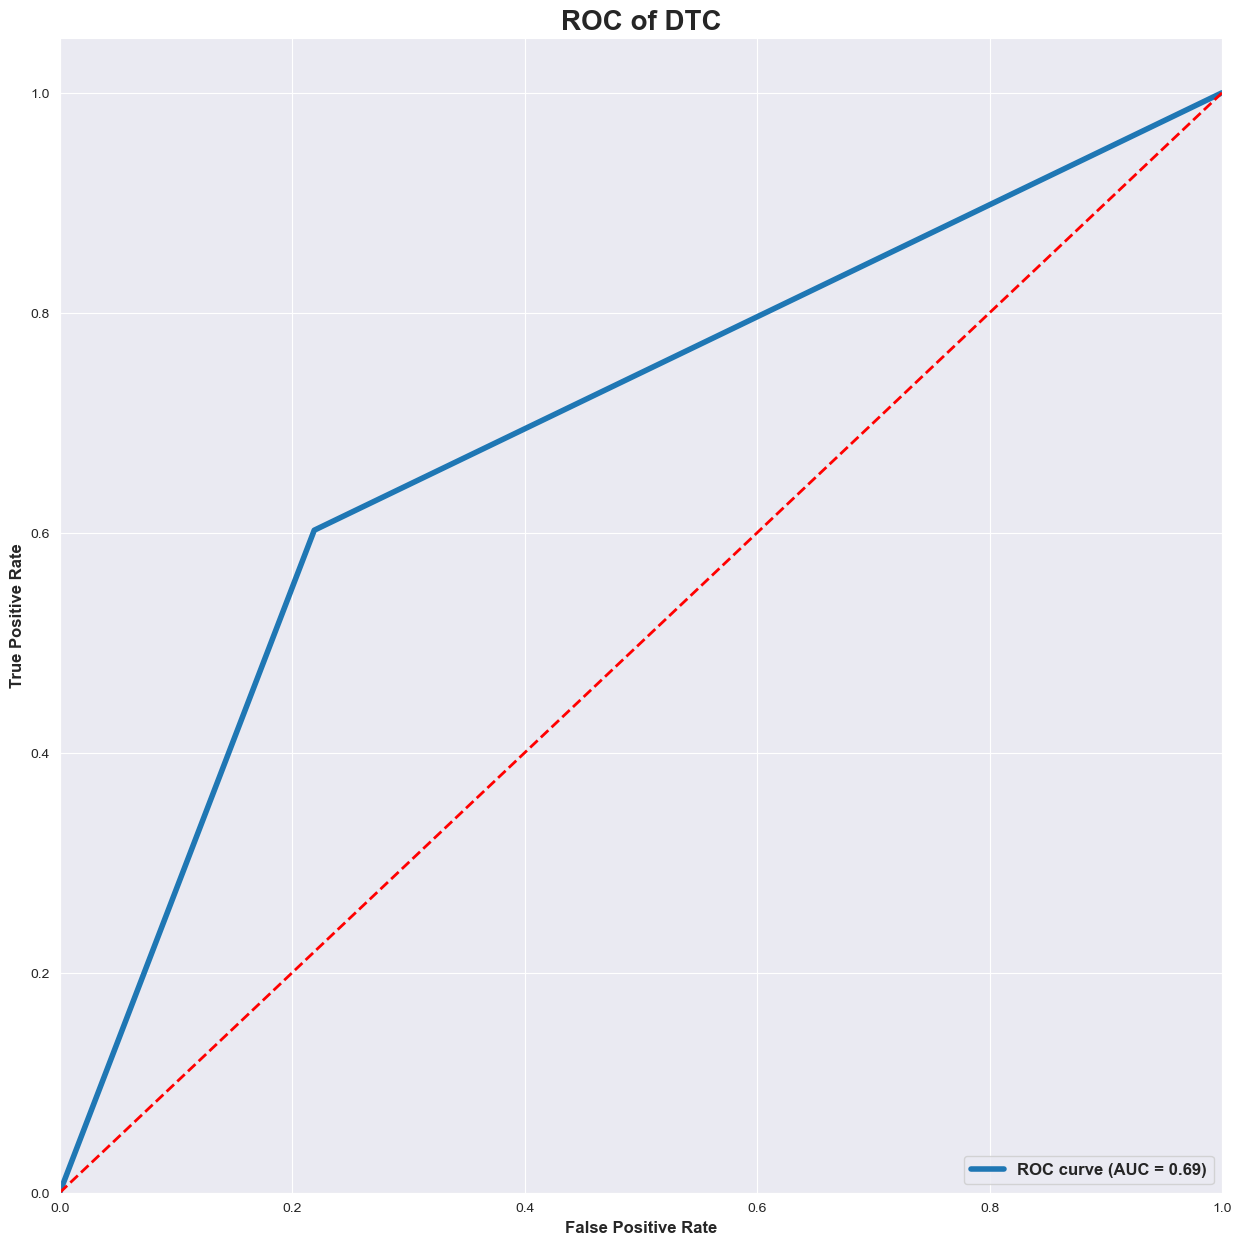

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       242
           1       0.50      0.60      0.55        88

    accuracy                           0.73       330
   macro avg       0.67      0.69      0.68       330
weighted avg       0.75      0.73      0.74       330

AdaBoost Accuracy RD: 0.7727272727272727


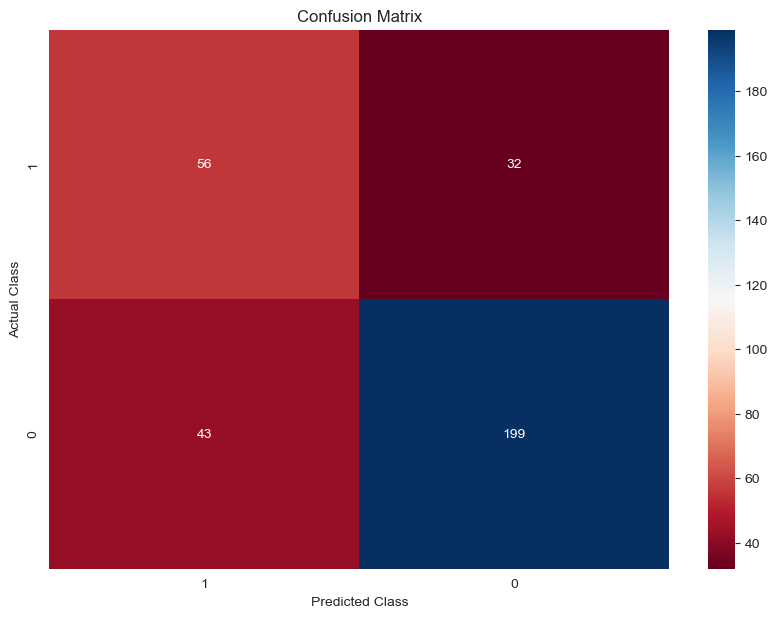

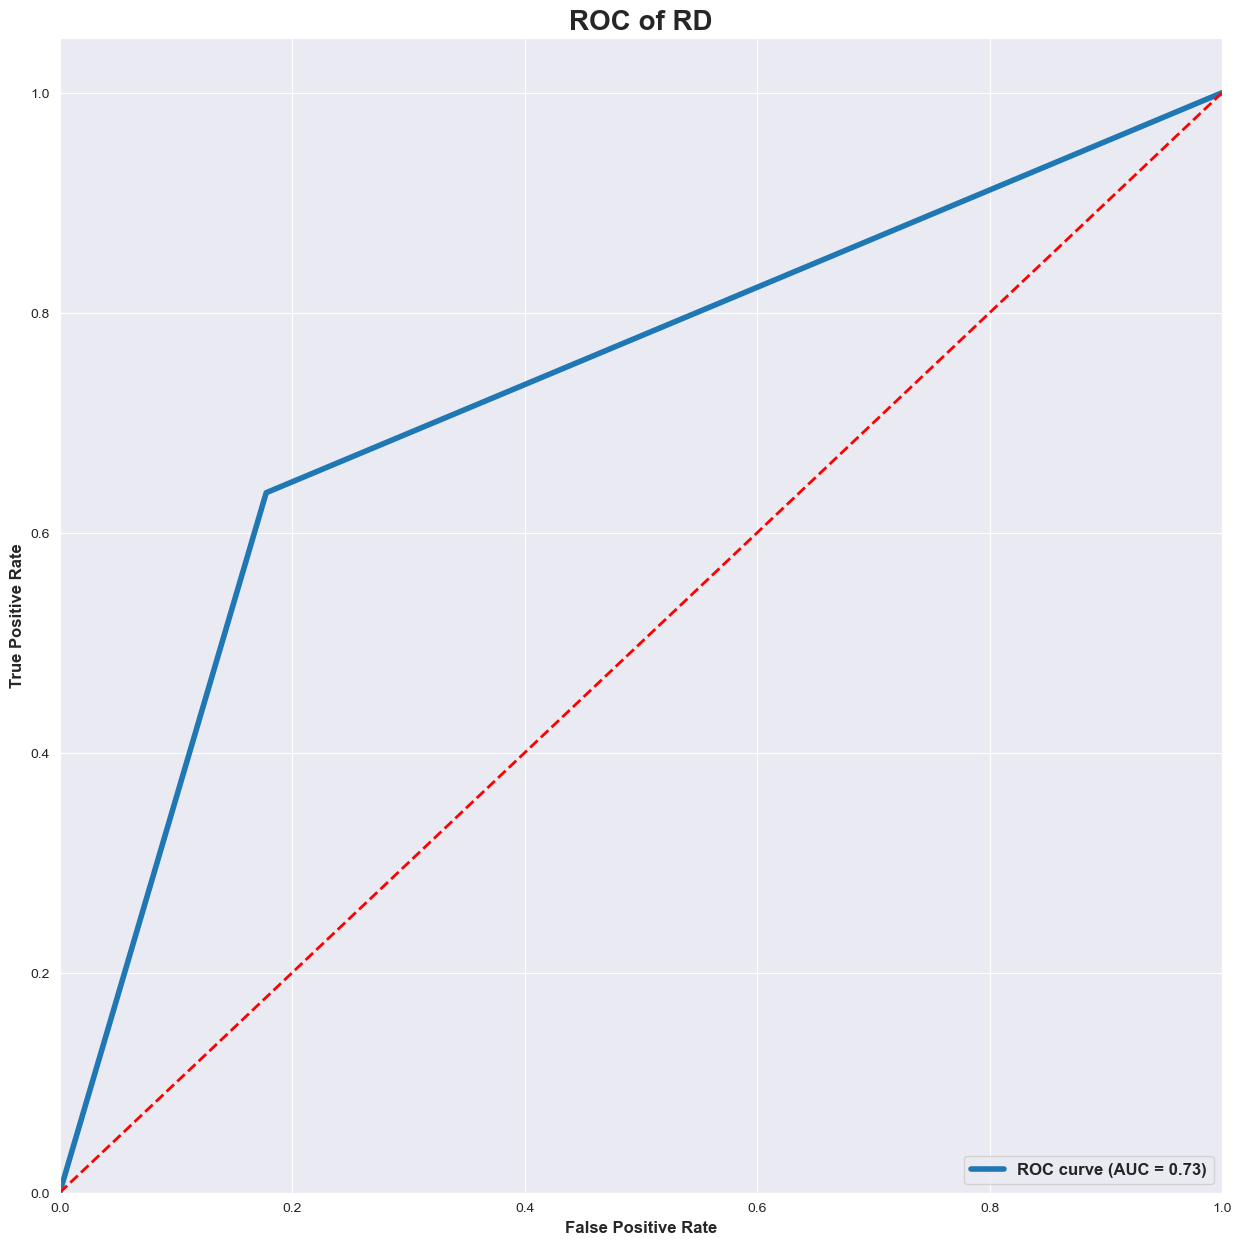

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       242
           1       0.57      0.64      0.60        88

    accuracy                           0.77       330
   macro avg       0.71      0.73      0.72       330
weighted avg       0.78      0.77      0.78       330



In [49]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier

# Load your dataset và chia thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = ...

# Khởi tạo mô hình cơ sở
models =[('DTC',best_dtc_model),('RD',best_rf_model)]
# Tạo mô hình AdaBoost
for name,model in models:
    adaboost_model = AdaBoostClassifier(base_estimator=model, n_estimators=50, random_state=42)

    # Huấn luyện mô hình AdaBoost
    adaboost_model.fit(x_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = adaboost_model.predict(x_test)

    # Đánh giá độ chính xác của mô hình
    accuracy = accuracy_score(y_test, y_pred)
    print(f"AdaBoost Accuracy {name}:", accuracy)
    predictions = adaboost_model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

    # Vẽ heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Class")
    plt.xlabel("Predicted Class")
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    # Tính diện tích dưới đường cong ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Vẽ đường cong ROC
    ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
    ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
    ax.set_title(f'ROC of {name}',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
    ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'}) 
    plt.show()
    # evaluate_result['SVM']=classification_report(y_test, predictions)

    print(classification_report(y_test, predictions))


Bagging Accuracy SVM: 0.7727272727272727


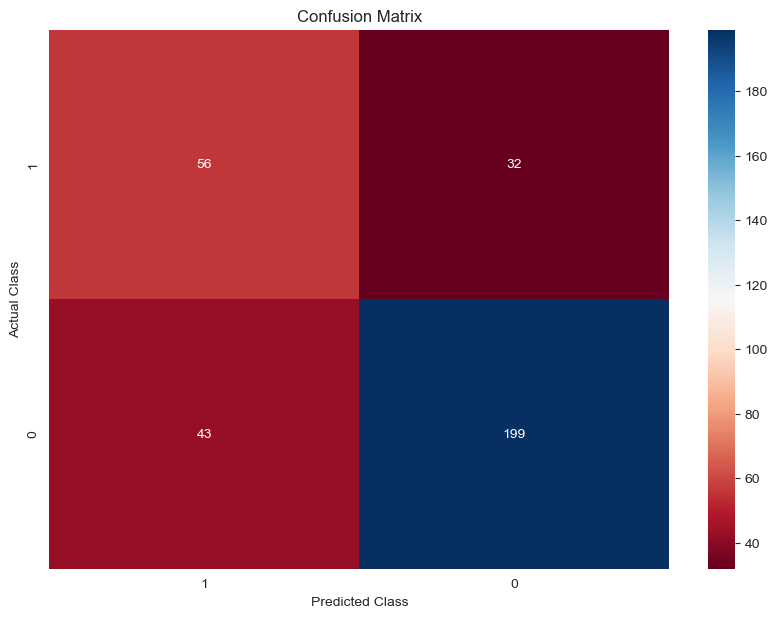

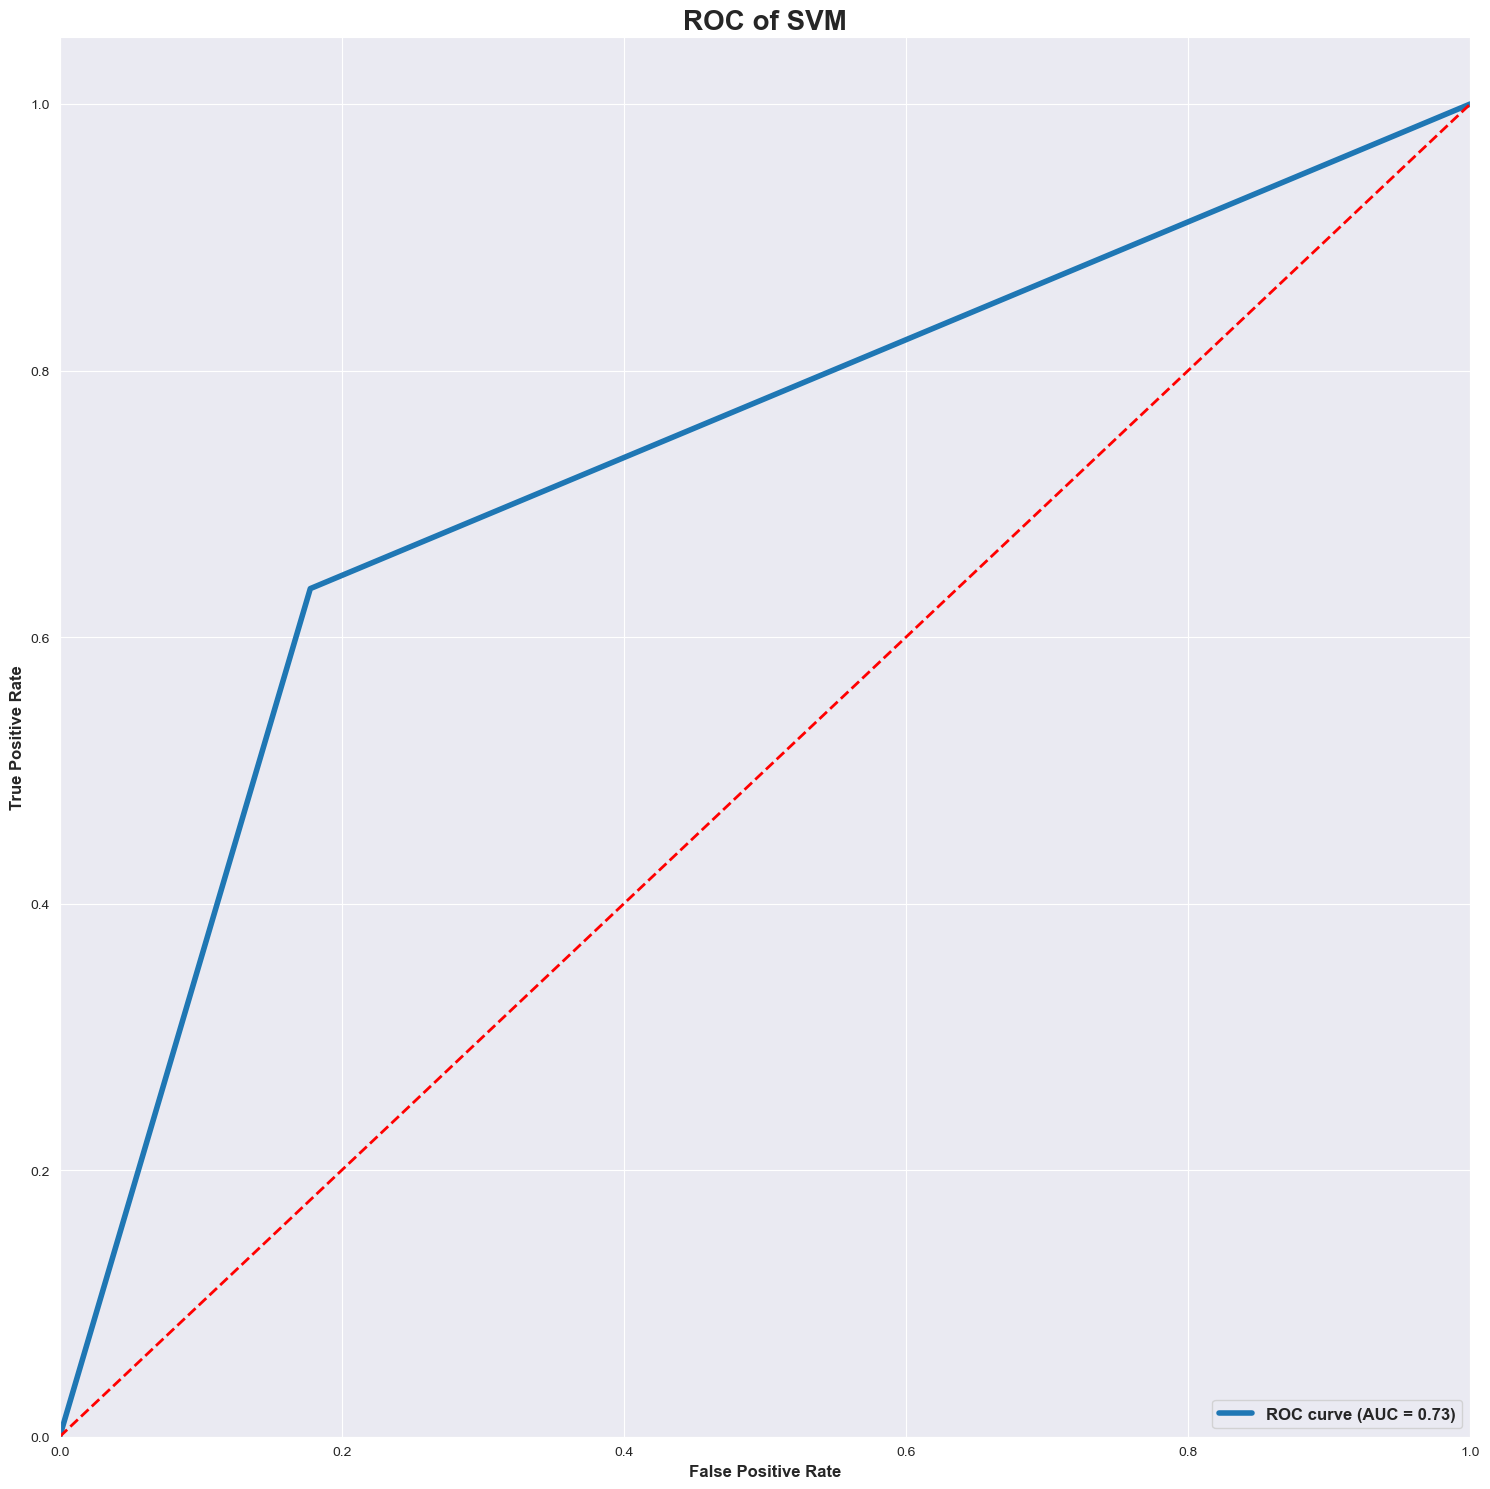

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       242
           1       0.57      0.64      0.60        88

    accuracy                           0.77       330
   macro avg       0.71      0.73      0.72       330
weighted avg       0.78      0.77      0.78       330

Bagging Accuracy DTC: 0.7727272727272727


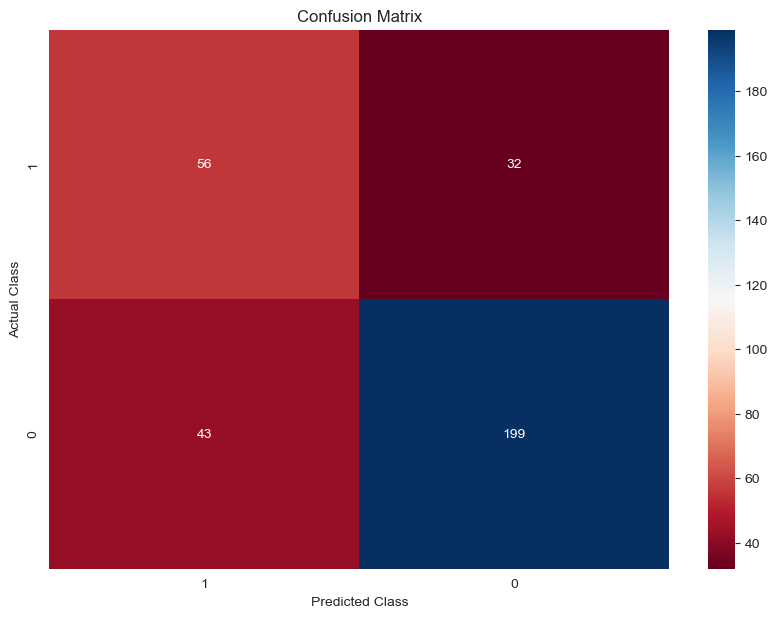

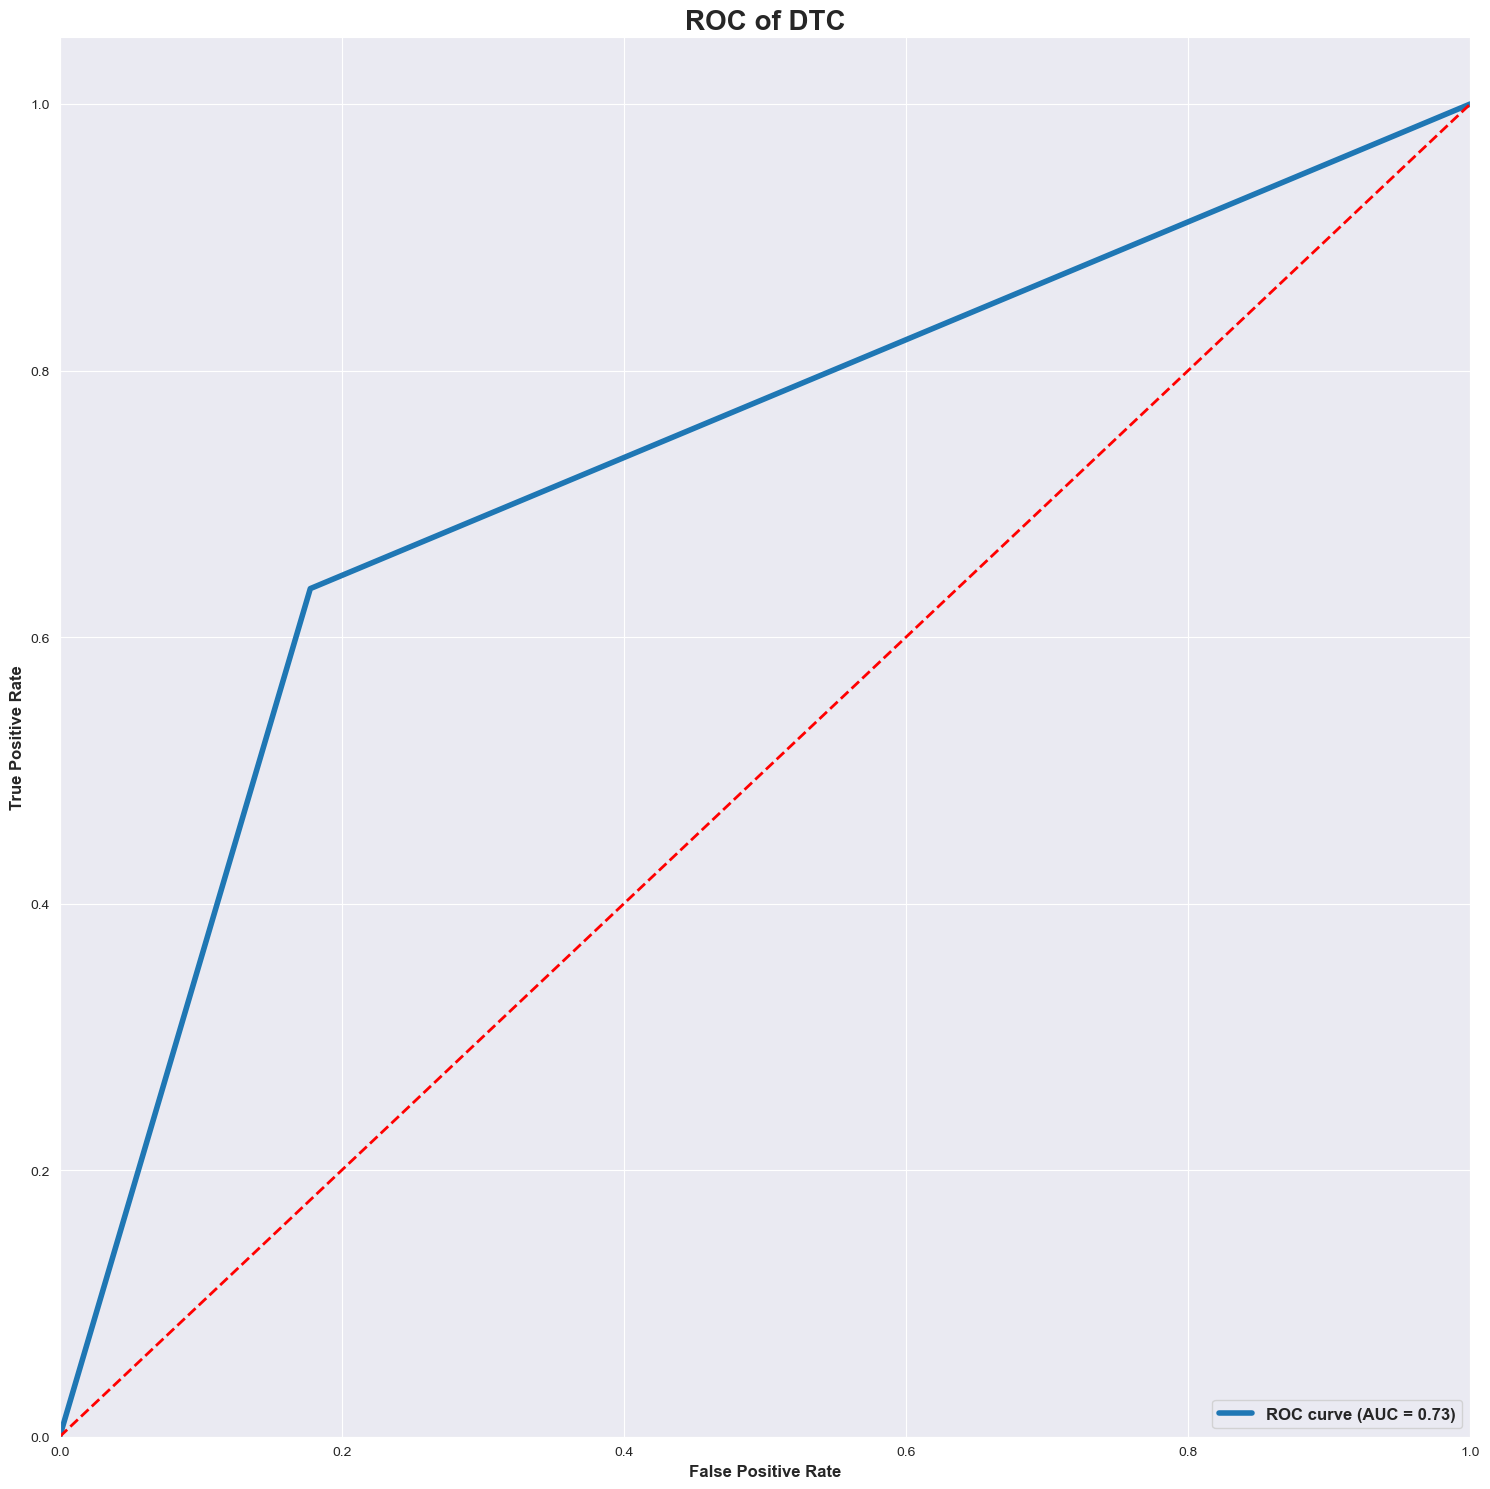

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       242
           1       0.57      0.64      0.60        88

    accuracy                           0.77       330
   macro avg       0.71      0.73      0.72       330
weighted avg       0.78      0.77      0.78       330

Bagging Accuracy RD: 0.7727272727272727


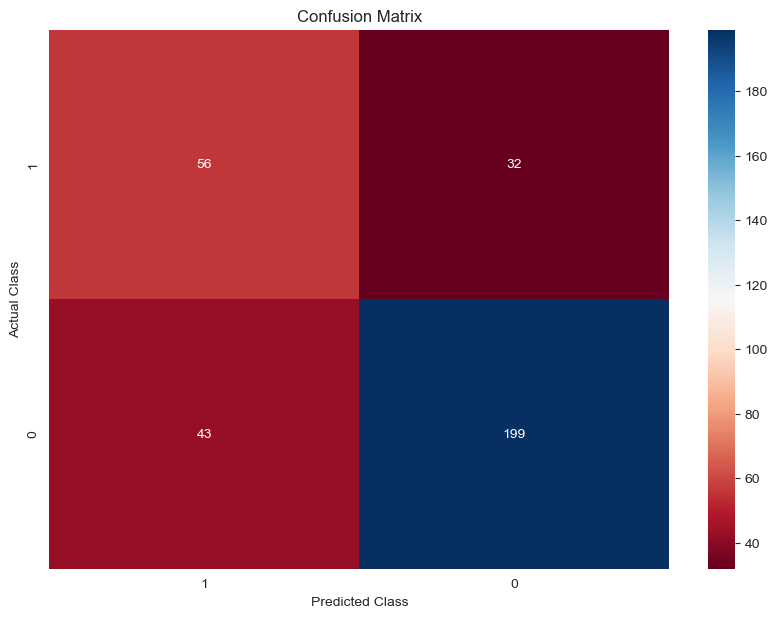

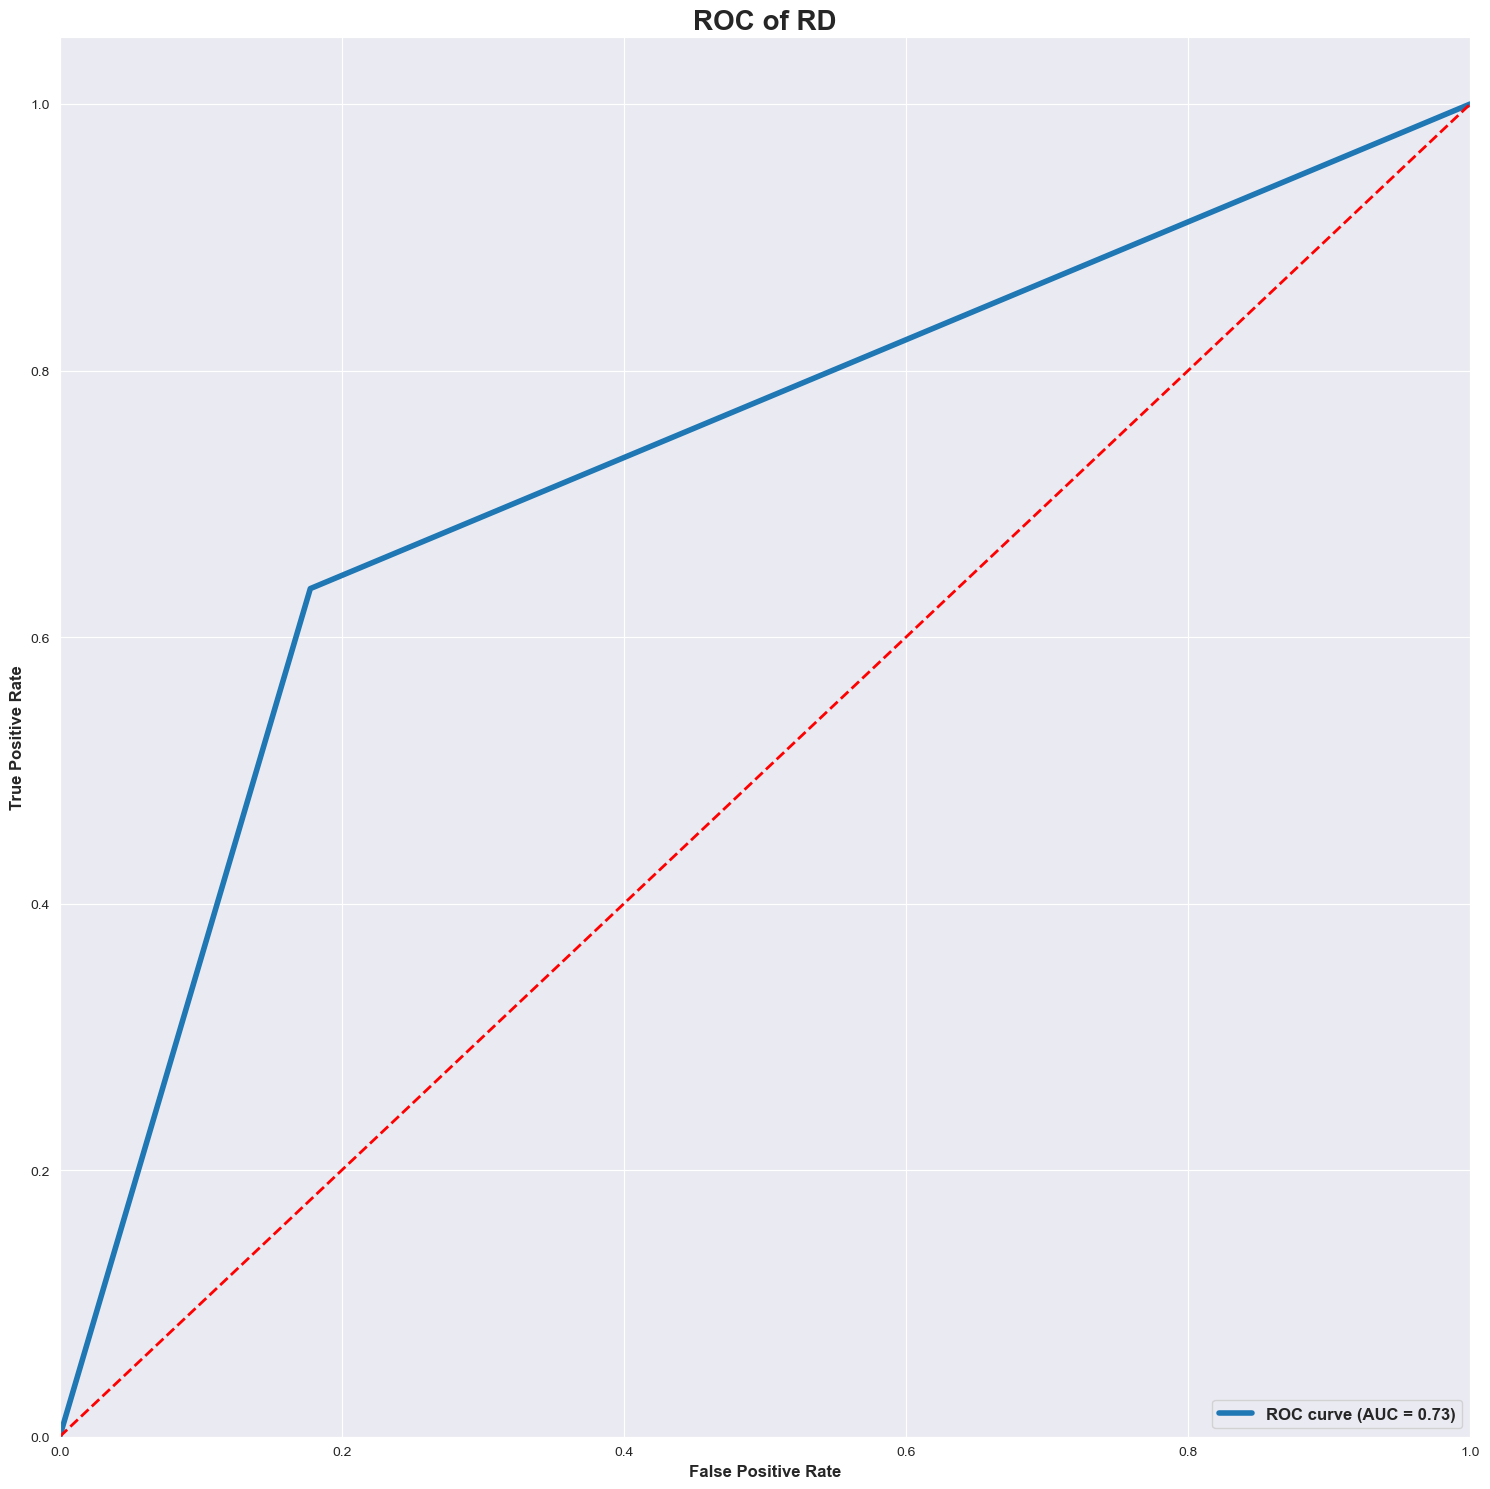

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       242
           1       0.57      0.64      0.60        88

    accuracy                           0.77       330
   macro avg       0.71      0.73      0.72       330
weighted avg       0.78      0.77      0.78       330



In [51]:
from sklearn.ensemble import BaggingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC

# Load your dataset và chia thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = ...

models =[('SVM',best_dt_model),('DTC',best_dtc_model),('RD',best_rf_model)]
# Tạo mô hình AdaBoost
for name,model in models:
    bagging_model = BaggingClassifier(model, n_estimators=10, random_state=42)

# Huấn luyện mô hình Bagging
    bagging_model.fit(x_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = adaboost_model.predict(x_test)

    # Đánh giá độ chính xác của mô hình
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Bagging Accuracy {name}:", accuracy)
    predictions = adaboost_model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

    # Vẽ heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Class")
    plt.xlabel("Predicted Class")
    fpr, tpr, _ = roc_curve(y_test, predictions)
    
    # Tính diện tích dưới đường cong ROC (AUC)
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    roc_auc = auc(fpr, tpr)

    # Vẽ đường cong ROC
    ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
    ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
    ax.set_title(f'ROC of {name}',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
    ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'})  # Đặt kích thước và độ dày cho chú thích
    plt.tight_layout()

    plt.show()
    # evaluate_result['SVM']=classification_report(y_test, predictions)

    print(classification_report(y_test, predictions))
    


In [53]:
import numpy as np

# Assume we have predictions from three base models: model1_pred, model2_pred, model3_pred
model1_pred = best_dt_model.predict(x_test[feature_selection['SVM']]) # Example predictions from model 1
model2_pred = best_dtc_model.predict(x_test[feature_selection['DTC']]) # Example predictions from model 2
model3_pred = best_rf_model.predict(x_test[feature_selection['RD']])  # Example predictions from model 3

# Define weights for each model
weights = [0.4, 0.6, 0.2]

# Compute weighted average predictions
weighted_avg_pred = np.average([model1_pred, model2_pred, model3_pred], axis=0, weights=weights)
binary_pred = np.where(weighted_avg_pred >= 0.5, 1, 0)

# print("Weighted Average Predictions:", weighted_avg_pred)
accuracy = accuracy_score(y_test, binary_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8151515151515152


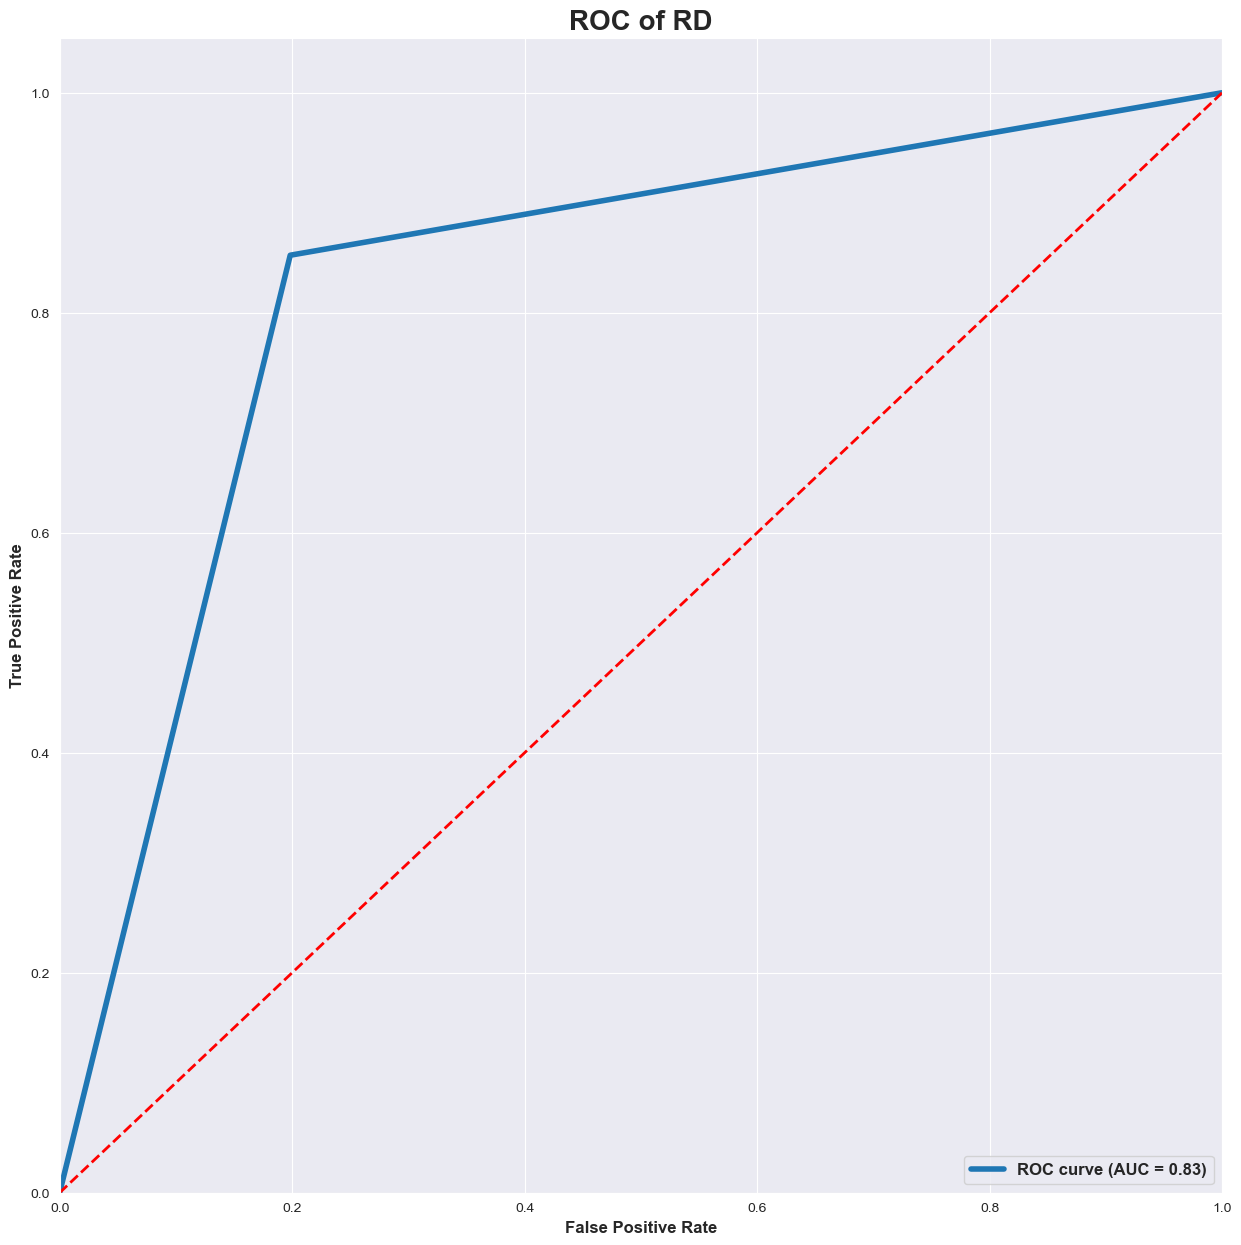

In [54]:

fpr, tpr, _ = roc_curve(y_test, binary_pred)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))


# Tính diện tích dưới đường cong ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
ax.set_title(f'ROC of {name}',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'})  # Đặt kích thước và độ dày cho chú thích

In [55]:
best_dt_model

SVC(C=3.0226716578871273, gamma='auto')

In [56]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# Assume we have X_train, y_train, X_val, y_val from our dataset

# Split the training set further into training and validation sets for blending
# X_train_base, X_blend, y_train_base, y_blend = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Make predictions on the blending set
pred1 = best_dt_model.predict(x_train[feature_selection['SVM']])
pred2 = best_rf_model.predict(x_train[feature_selection['RD']])
# pred3 = best_dt_model.predict(x_test)

# Combine predictions as input features for the meta-learner
blend_features = np.column_stack((pred1, pred2))

# Train the meta-learner on the blending set
# meta_learner = LogisticRegression()
best_dtc_model.fit(blend_features, y_train)

# Make predictions on the validation set
blend_pred = best_dtc_model.predict(np.column_stack((best_dt_model.predict(x_test[feature_selection['SVM']]), best_rf_model.predict(x_test[feature_selection['RD']]))))

# Evaluate the blended model
blend_accuracy = accuracy_score(y_test, blend_pred)
print("Blending Accuracy:", blend_accuracy)


Blending Accuracy: 0.7848484848484848


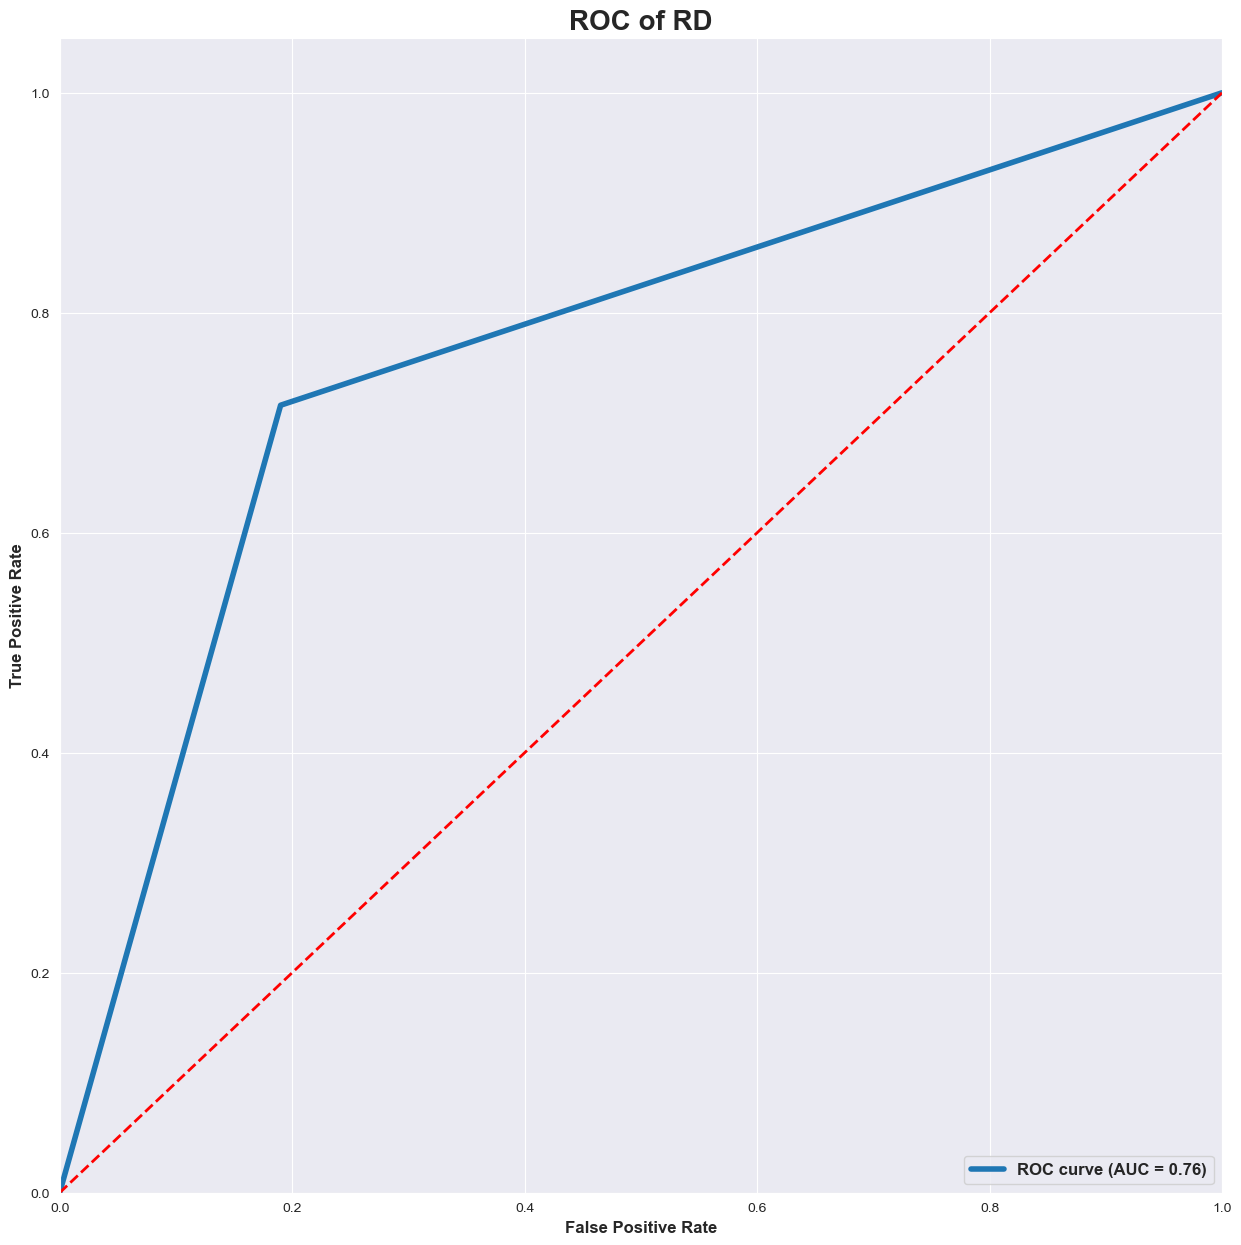

In [57]:

fpr, tpr, _ = roc_curve(y_test, blend_pred)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))


# Tính diện tích dưới đường cong ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
ax.set_title(f'ROC of {name}',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'})  # Đặt kích thước và độ dày cho chú thích

In [58]:
from mlxtend.classifier import StackingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier

# Load your dataset và chia thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = ...

# Khởi tạo các mô hình cơ sở
base_models = [
    best_dt_model,
    best_boosting_model,
    best_rf_model,
]

# Khởi tạo mô hình meta-learner
meta_learner = best_rf_model

rf_pred = best_rf_model.predict(x_test[feature_selection['RD']])
svm_pred =best_dt_model.predict(x_test[feature_selection['SVM']])
bg_pred = best_boosting_model.predict(x_test[feature_selection['BG']])


# keras_pred = keras_clf.predict(x_test)
stacked_input = np.column_stack((rf_pred,bg_pred,svm_pred))

# Tạo mô hình Stacking
# stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

stacked_model = StackingClassifier(
    classifiers=base_models,
    meta_classifier=meta_learner
)

# Huấn luyện mô hình Stacking
stacked_model.fit(stacked_input, y_test)

# Dự đoán trên tập kiểm tra
y_pred = stacked_model.predict(stacked_input)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7909090909090909


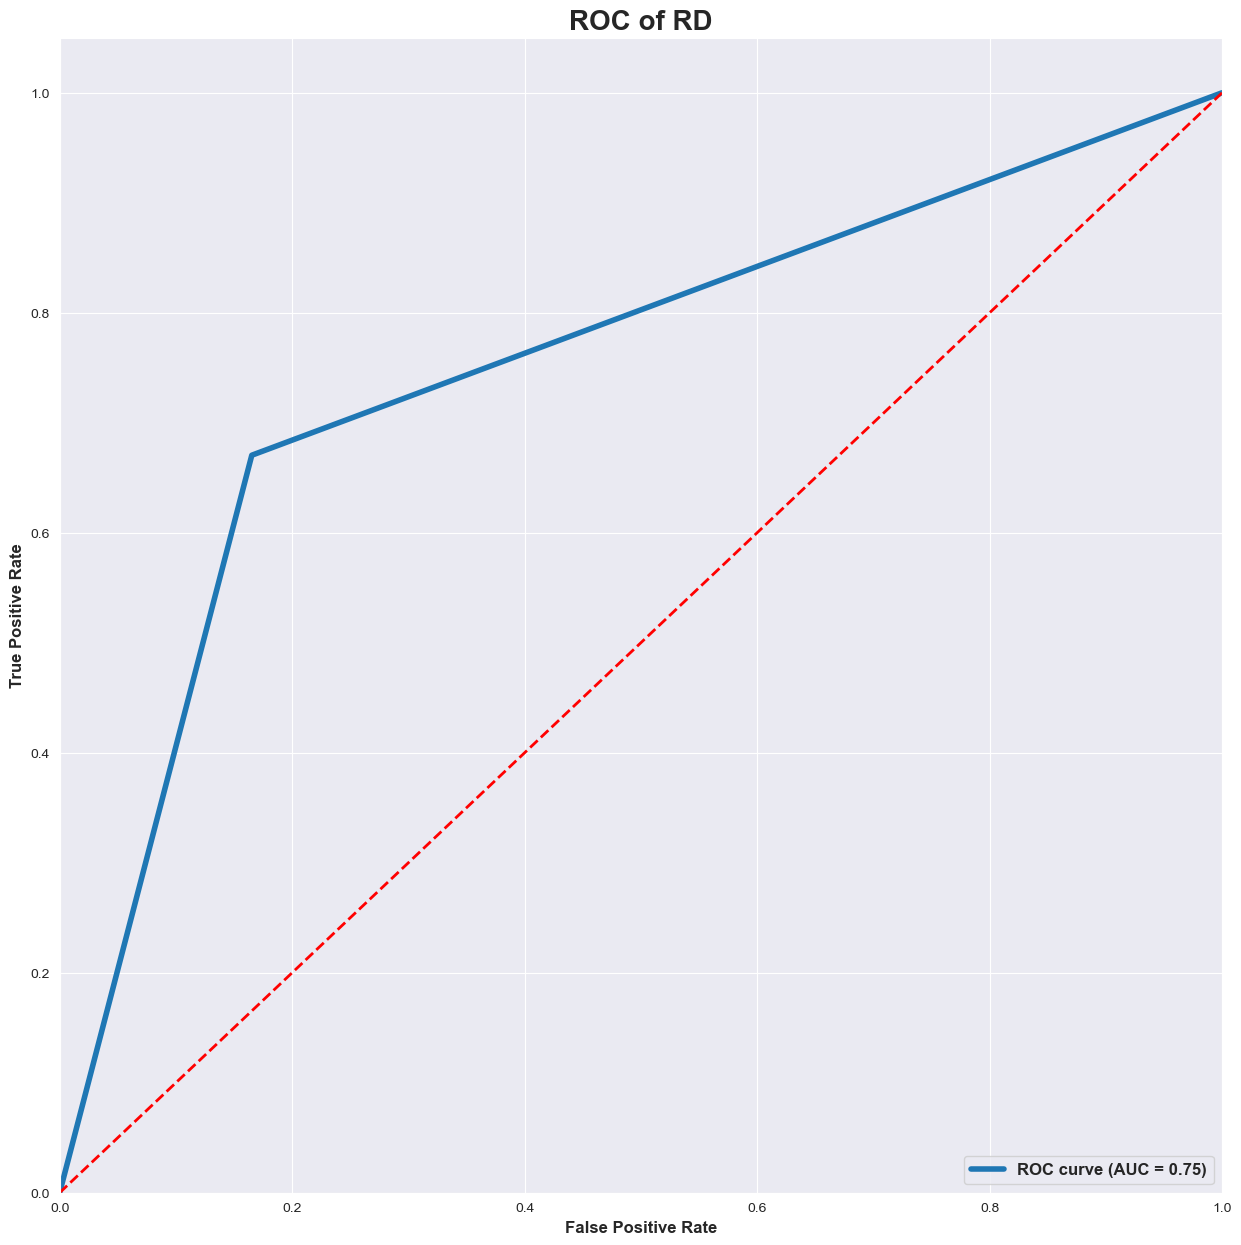

In [59]:

fpr, tpr, _ = roc_curve(y_test, y_pred)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))


# Tính diện tích dưới đường cong ROC (AUC)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
ax.plot(fpr, tpr, lw=4, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  # Đặt kích thước và độ dày cho nhãn trục x
ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   # Đặt kích thước và độ dày cho nhãn trục y
ax.set_title(f'ROC of {name}',fontsize=20, weight='bold')  # Đặt kích thước và độ dày cho tiêu đề
ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'})  # Đặt kích thước và độ dày cho chú thích